In [1]:
import sys
import os
sys.path.append(os.path.abspath("../../../../"))

import pandas as pd
import utils
# Mining: multidupehack
# Plotting
import plot_automations as plotter

Loïc Cerf and Wagner Meira Jr. Complete Discovery of High-Quality Patterns in Large Numerical Tensors. In ICDE'14: Proceedings of the 30th International Conference on Data Engineering, pages 448–459. IEEE Computer Society, April 2014.

**1. Multidupehack input file**

In [2]:
df = pd.read_csv("../../../../01_color_clustering/non-weighted/omniart-post-color-clustering.csv")

In [3]:
color_clusters = pd.read_csv("../../../../01_color_clustering/non-weighted/color_centroids.csv")

In [4]:
#utils.prepare_multidupehack_input(df, color_clusters, "decade", "decade_mining.txt")

**2. Itemset mining**

In [5]:
patterns_df = utils.parse_patterns("decade_patterns.txt", "decades")

In [6]:
hex_to_name = dict(zip(color_clusters['HEX'].str.upper(), color_clusters['name']))
    
patterns_df['colors_names'] = patterns_df['colors'].apply(
    lambda hex_list: [hex_to_name[hex.upper()] for hex in (eval(hex_list) if isinstance(hex_list, str) else hex_list)])

In [7]:
patterns_df

decades  \
0                                          [2010, 2000]   
1     [1810, 1990, 1850, 1980, 1860, 1890, 1910, 193...   
2      [1890, 1910, 1930, 1950, 1960, 1920, 2010, 2000]   
3     [1980, 1890, 1910, 1930, 1950, 1960, 1920, 201...   
4     [1990, 1850, 1860, 1890, 1910, 1930, 1950, 196...   
...                                                 ...   
6366  [790, -40, 1160, 1140, 870, -250, 1000, 960, -...   
6367  [700, 450, 550, 890, 300, 790, 680, 400, -40, ...   
6368  [610, 320, 790, -380, 1050, 1110, -40, 1160, 1...   
6369  [730, 610, 320, 790, -380, 1030, 1050, 1110, -...   
6370  [670, 610, 320, 790, 740, -380, 1050, 1110, -4...   

                                                 colors  n_decades  n_colors  \
0     [#701308, #ED4D36, #EED7D4, #AF9490, #F00C0E, ...          2        60   
1     [#EED7D4, #A90908, #56151B, #902A21, #550404, ...         13        50   
2     [#EED7D4, #AF9490, #513633, #F00C0E, #E72F3D, ...          8        58   
3     [#EED7D4, #AF9490, #955B5D, #F00C0E, #E72F3D, ...          9        57   
4     [#EED7D4, #513633, #F00C0E, #E72F3D, #CC090B, ...         11        57   
...                                                 ...        ...       ...   
6366                                 [#ECDCDD, #955B5D]        103         2   
6367                                          [#ECDCDD]        111         1   
6368                                 [#C68D8B, #955B5D]        111         2   
6369                                          [#C68D8B]        114         1   
6370                                          [#955B5D]        118         1   

      support                                       colors_names  
0         120  [reddy-brown, tomato, pale-pink, mushroom, bri...  
1         650  [pale-pink, darkish-red, burgundy, red-brown, ...  
2         464  [pale-pink, mushroom, purple-brown, bright-red...  
3         513  [pale-pink, mushroom, brownish, bright-red, st...  
4         627  [pale-pink, purple-brown, bright-red, strawber...  
...       ...                                                ...  
6366      206                             [light-grey, brownish]  
6367      111                                       [light-grey]  
6368      222                           [greyish-pink, brownish]  
6369      114                                     [greyish-pink]  
6370      118                                         [brownish]  

[6371 rows x 6 columns]

Plot saved to images/decade_patterns_per_support_count.png


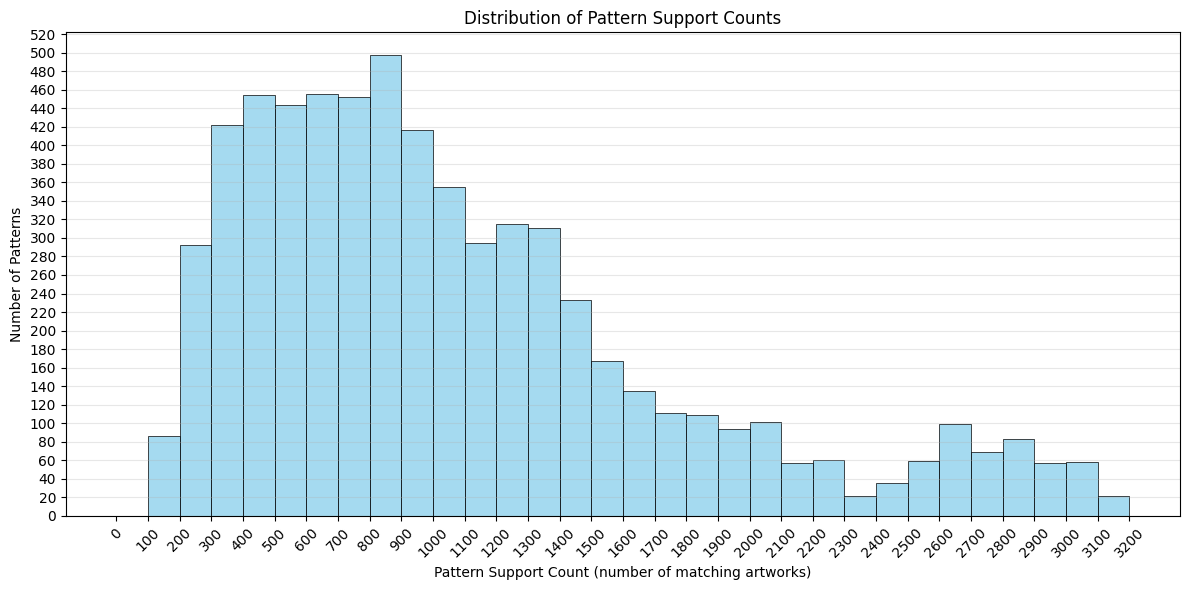

In [8]:
plotter.plot_support_analysis(patterns_df, "images/decade_patterns_per_support_count.png")

Plot saved to images/decade_n_decades_per_pattern.png


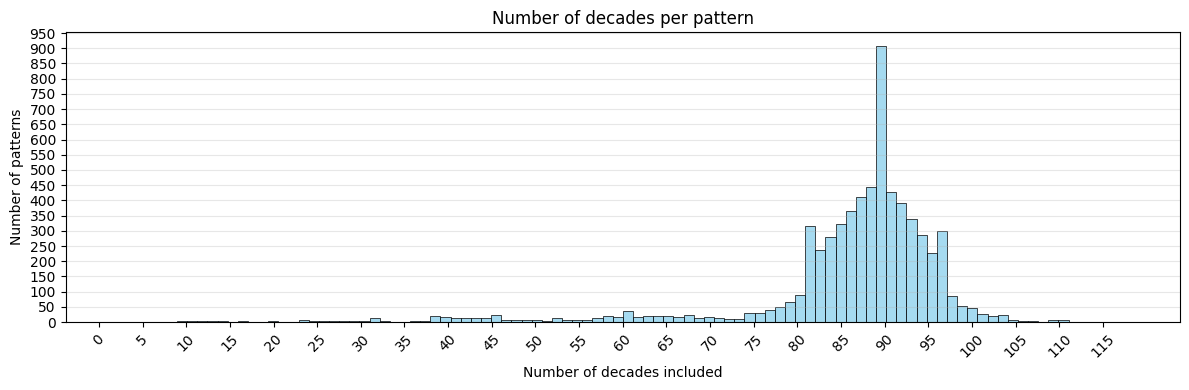

In [9]:
plotter.plot_pattern_size_distribution(patterns_df, "decades", "images/decade_n_decades_per_pattern.png")

Plot saved to images/decade_n_colors_per_pattern.png


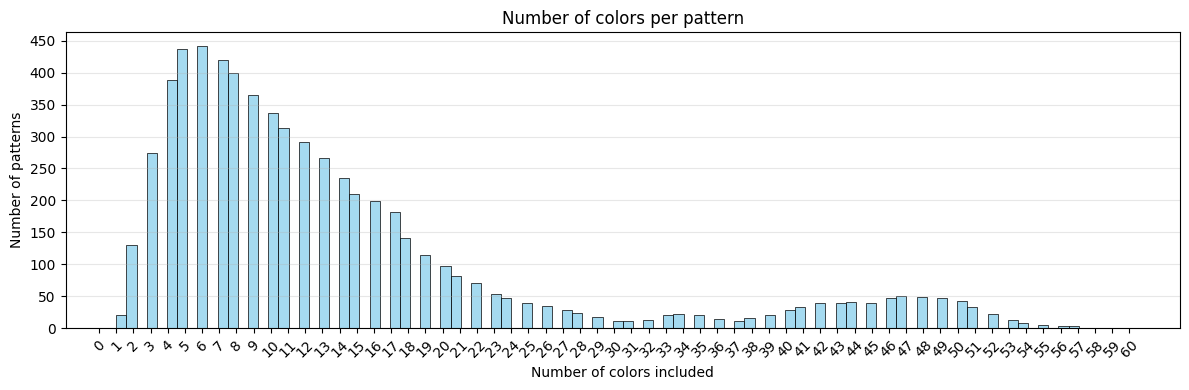

In [10]:
plotter.plot_pattern_size_distribution(patterns_df, "colors", "images/decade_n_colors_per_pattern.png")

Plot saved to images/decade_pattern_frequency_by_starting_decade.png


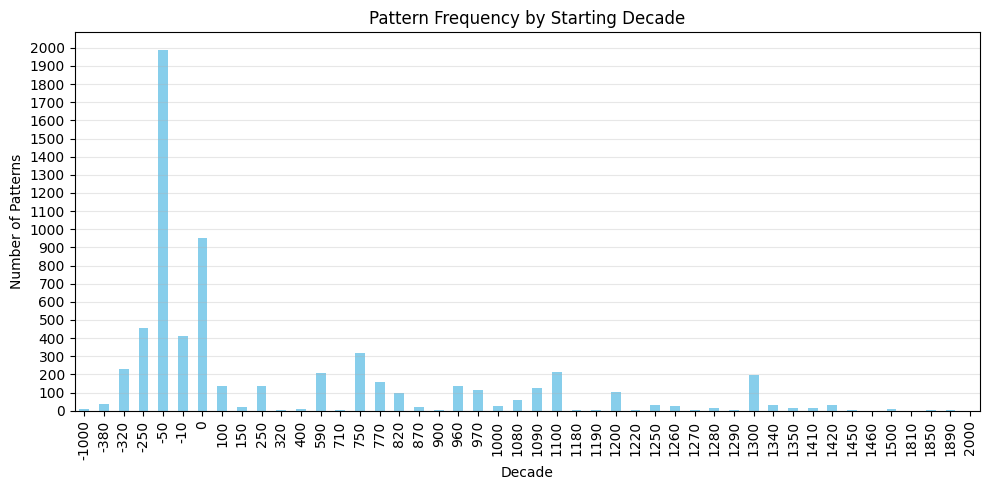

In [11]:
plotter.plot_temporal_patterns(patterns_df, "images/decade_pattern_frequency_by_starting_decade.png")

Color co-occurrence matrix saved to images/decade_color_cooccurrence_matrix.png


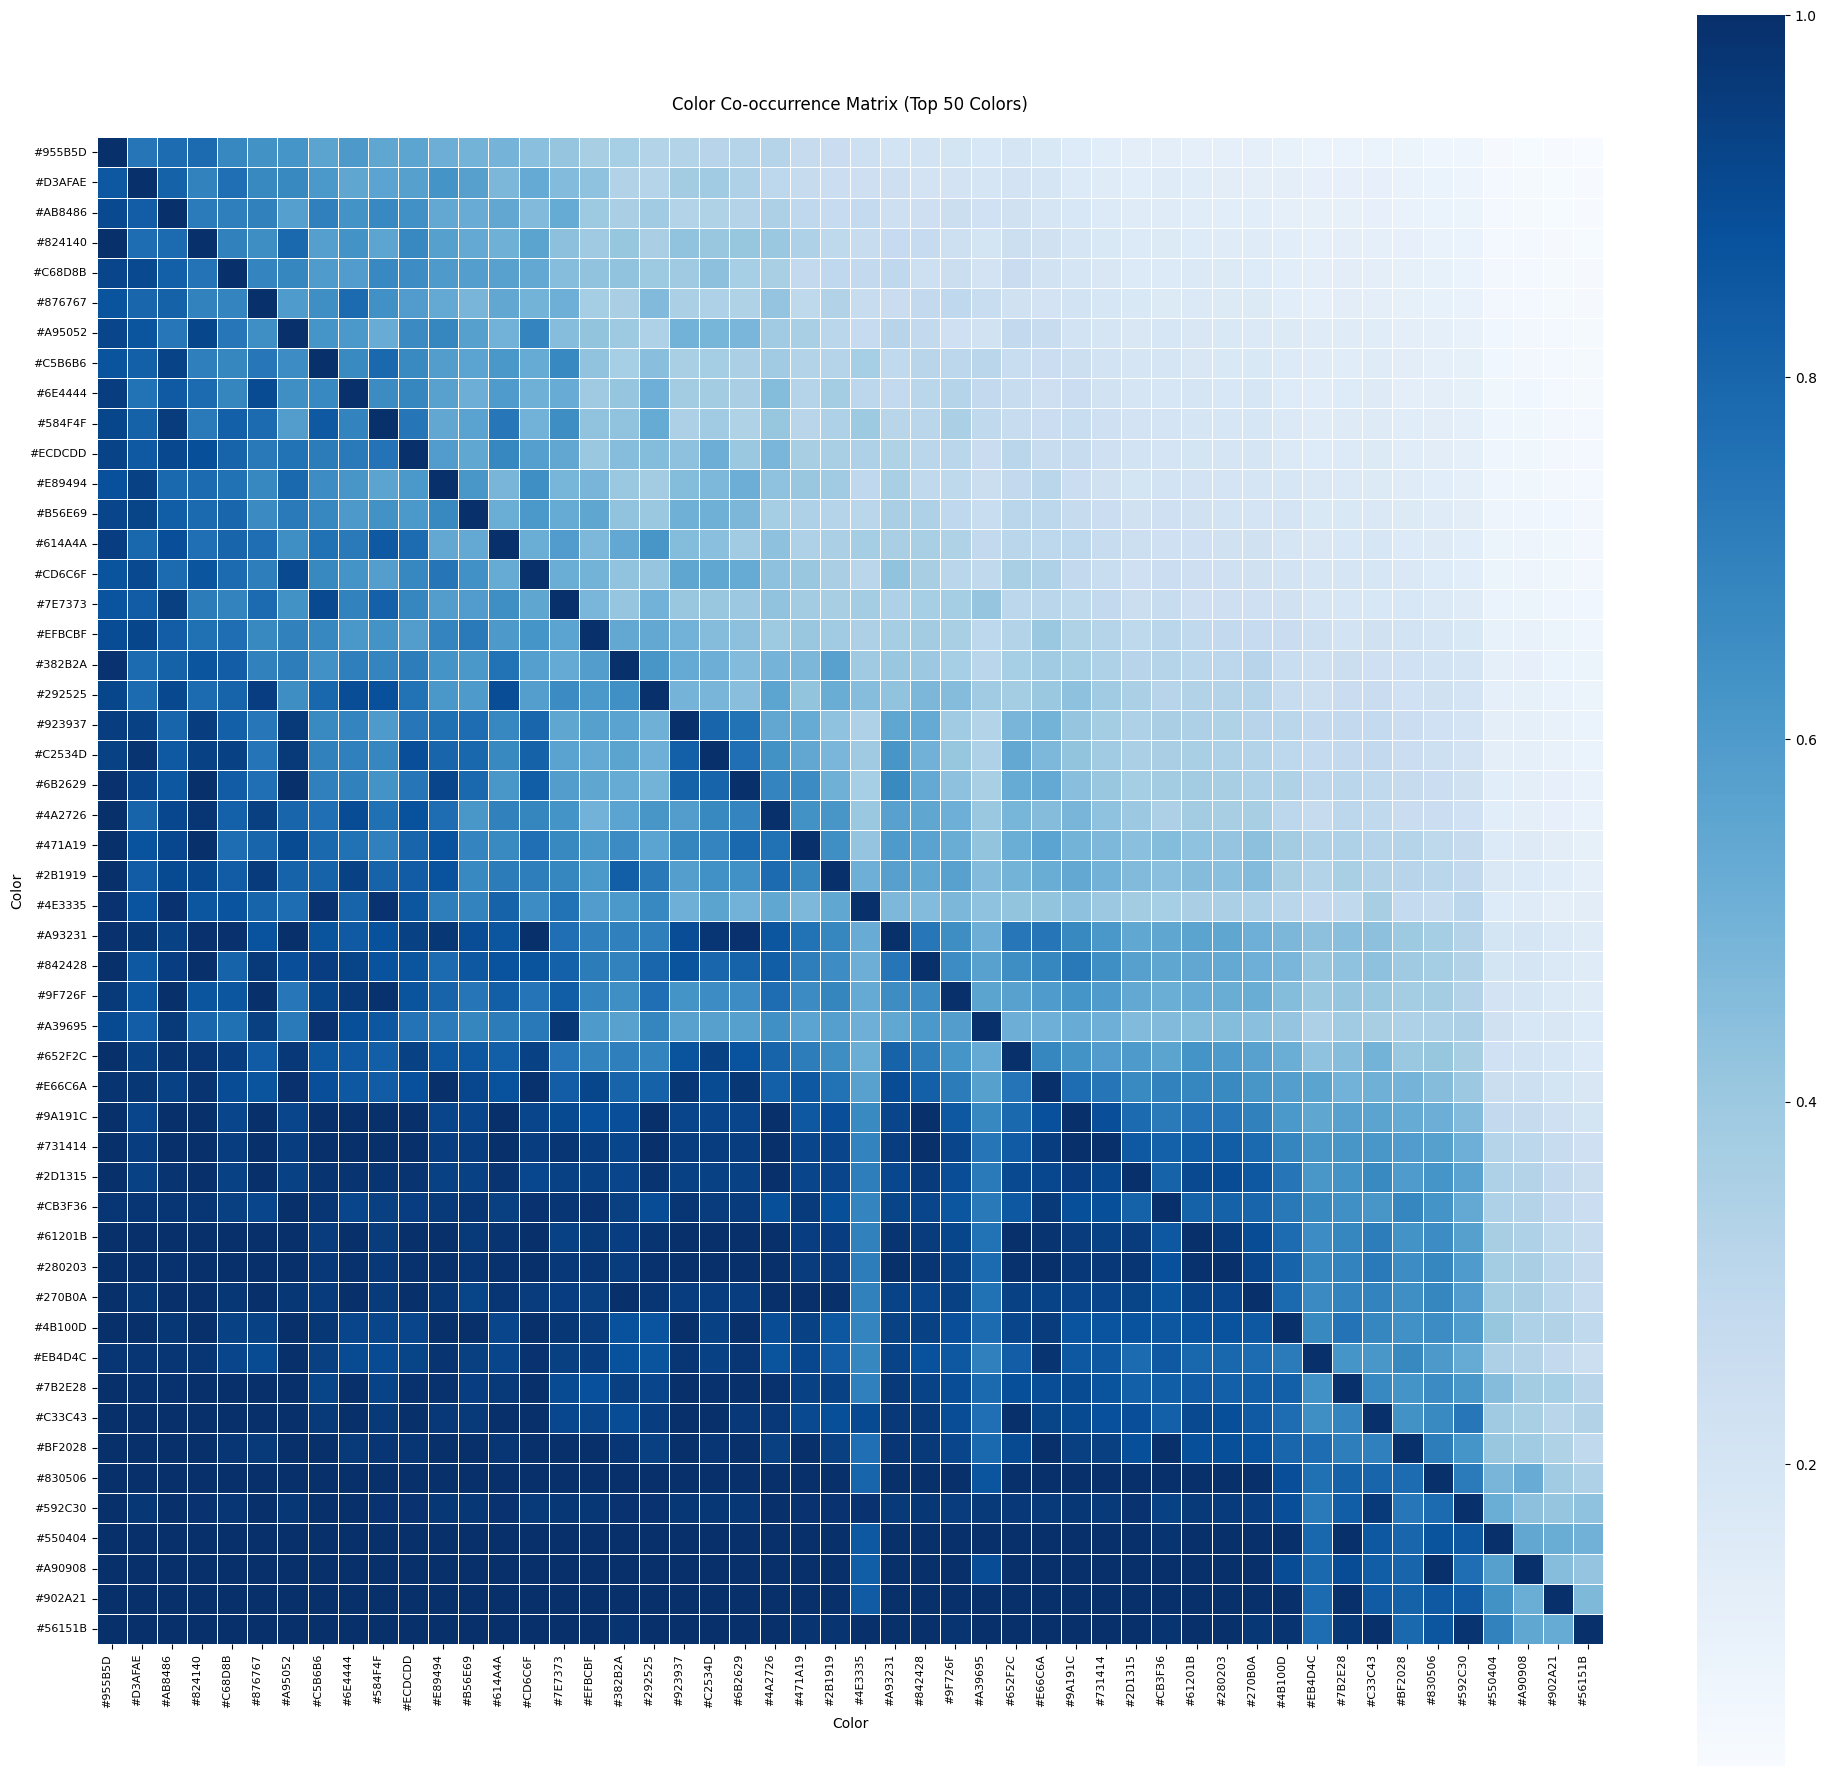

In [12]:
plotter.plot_color_cooccurrence_matrix(patterns_df, save_path="images/decade_color_cooccurrence_matrix.png")

In [13]:
patterns_df['decades_range'] = patterns_df['decades'].apply(
    lambda x: f"{min(int(d) for d in x)}-{max(int(d) for d in x)}" 
    if min(int(d) for d in x) != max(int(d) for d in x) 
    else str(min(int(d) for d in x))
)

In [14]:
unique_decade_ranges = patterns_df['decades_range'].unique()

In [15]:
unique_decade_ranges

array(['2000-2010', '1810-2010', '1890-2010', '1850-2010', '1500-2010',
       '1340-2010', '1460-2010', '1300-2010', '1420-2010', '1450-2010',
       '1260-2010', '1200-2010', '1410-2010', '1350-2010', '1090-2010',
       '1100-2010', '970-2010', '1250-2010', '1280-2010', '1270-2010',
       '1290-2010', '1190-2010', '1220-2010', '1180-2010', '770-2010',
       '900-2010', '-10-2010', '-50-2010', '0-2010', '750-2010',
       '150-2010', '400-2010', '1080-2010', '100-2010', '710-2010',
       '590-2010', '960-2010', '820-2010', '250-2010', '1000-2010',
       '-380-2010', '870-2010', '-1000-2010', '-320-2010', '-250-2010',
       '320-2010'], dtype=object)

Plot saved to images/color_palettes/2000-2010.png


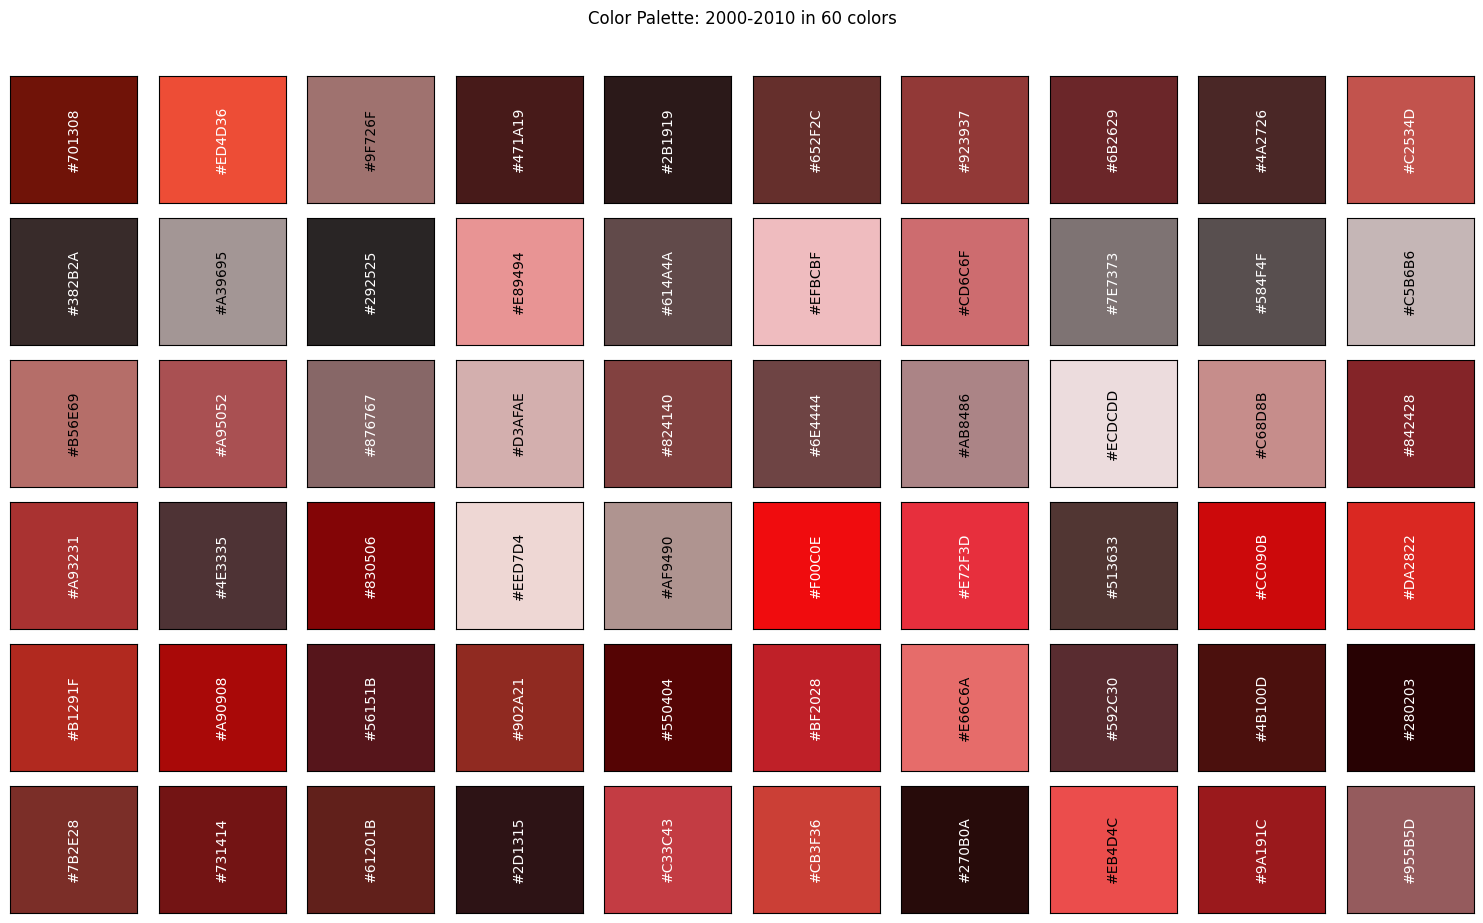

Plot saved to images/color_palettes/1810-2010.png


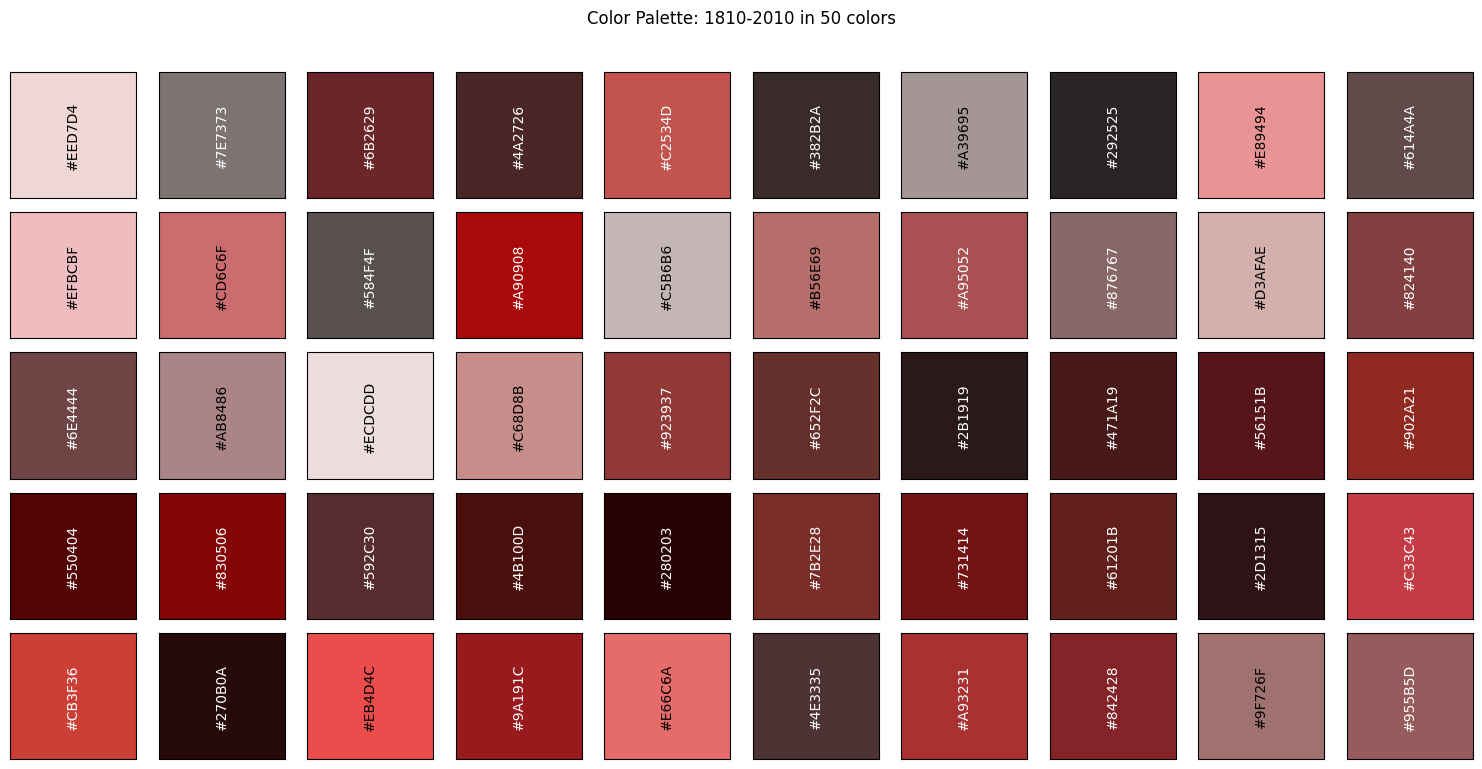

Plot saved to images/color_palettes/1890-2010.png


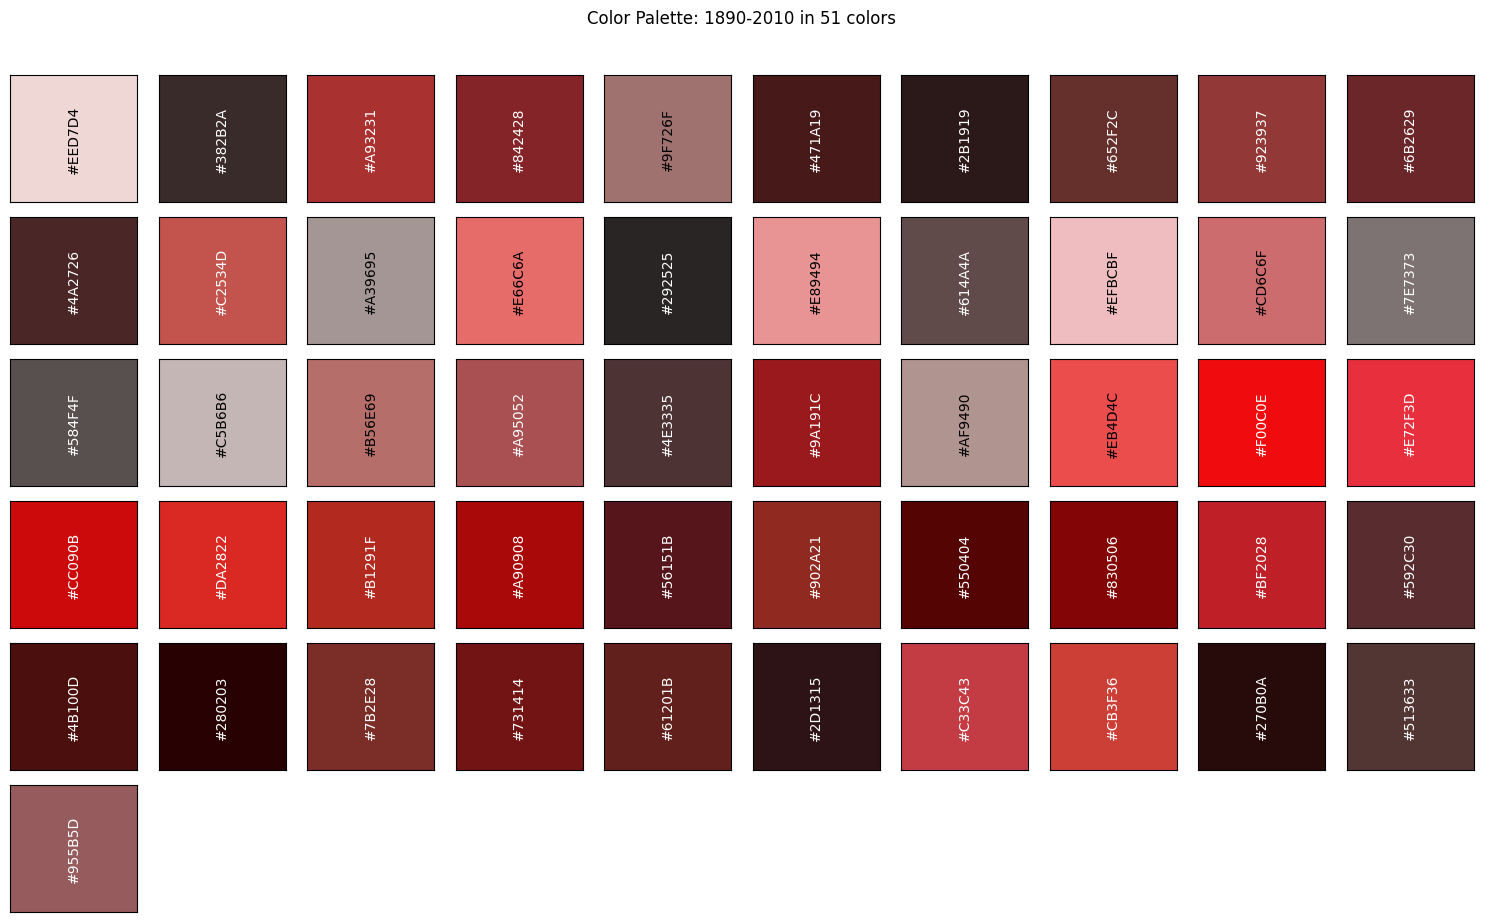

Plot saved to images/color_palettes/1850-2010.png


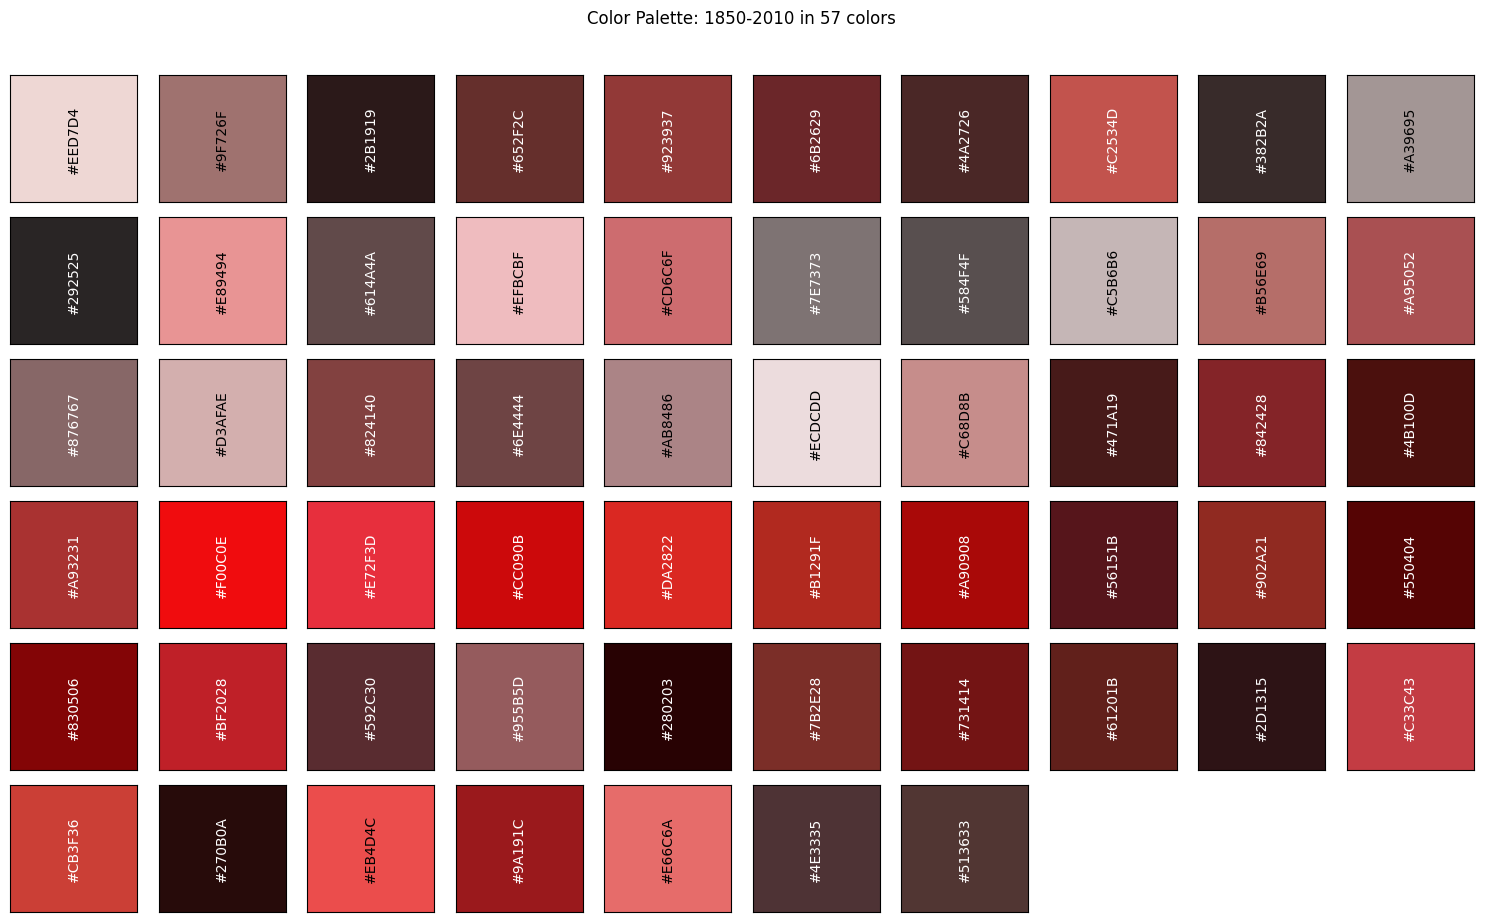

Plot saved to images/color_palettes/1500-2010.png


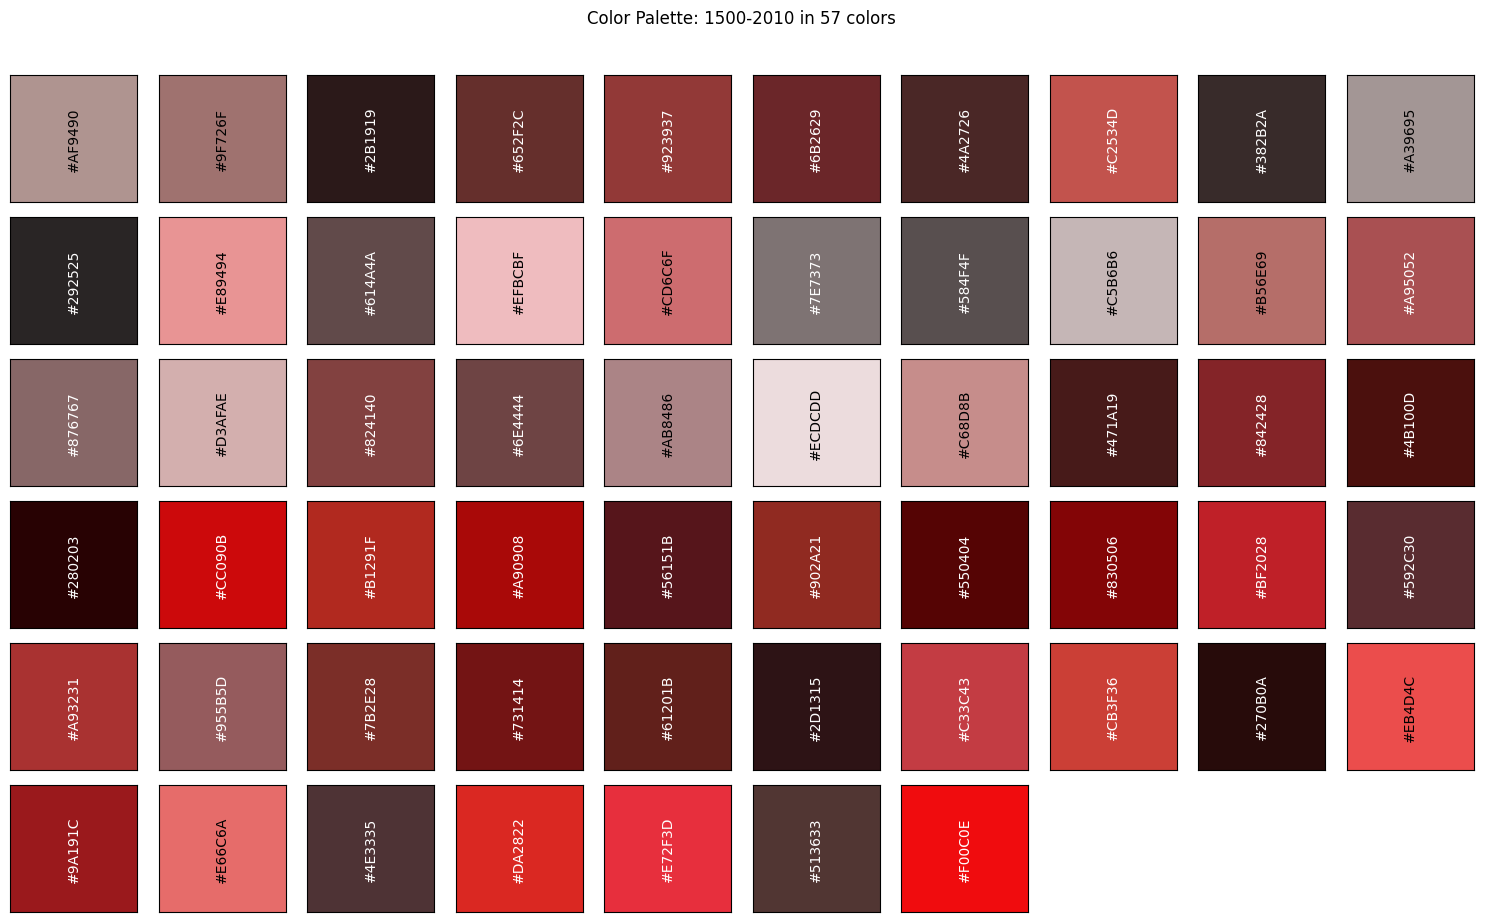

Plot saved to images/color_palettes/1340-2010.png


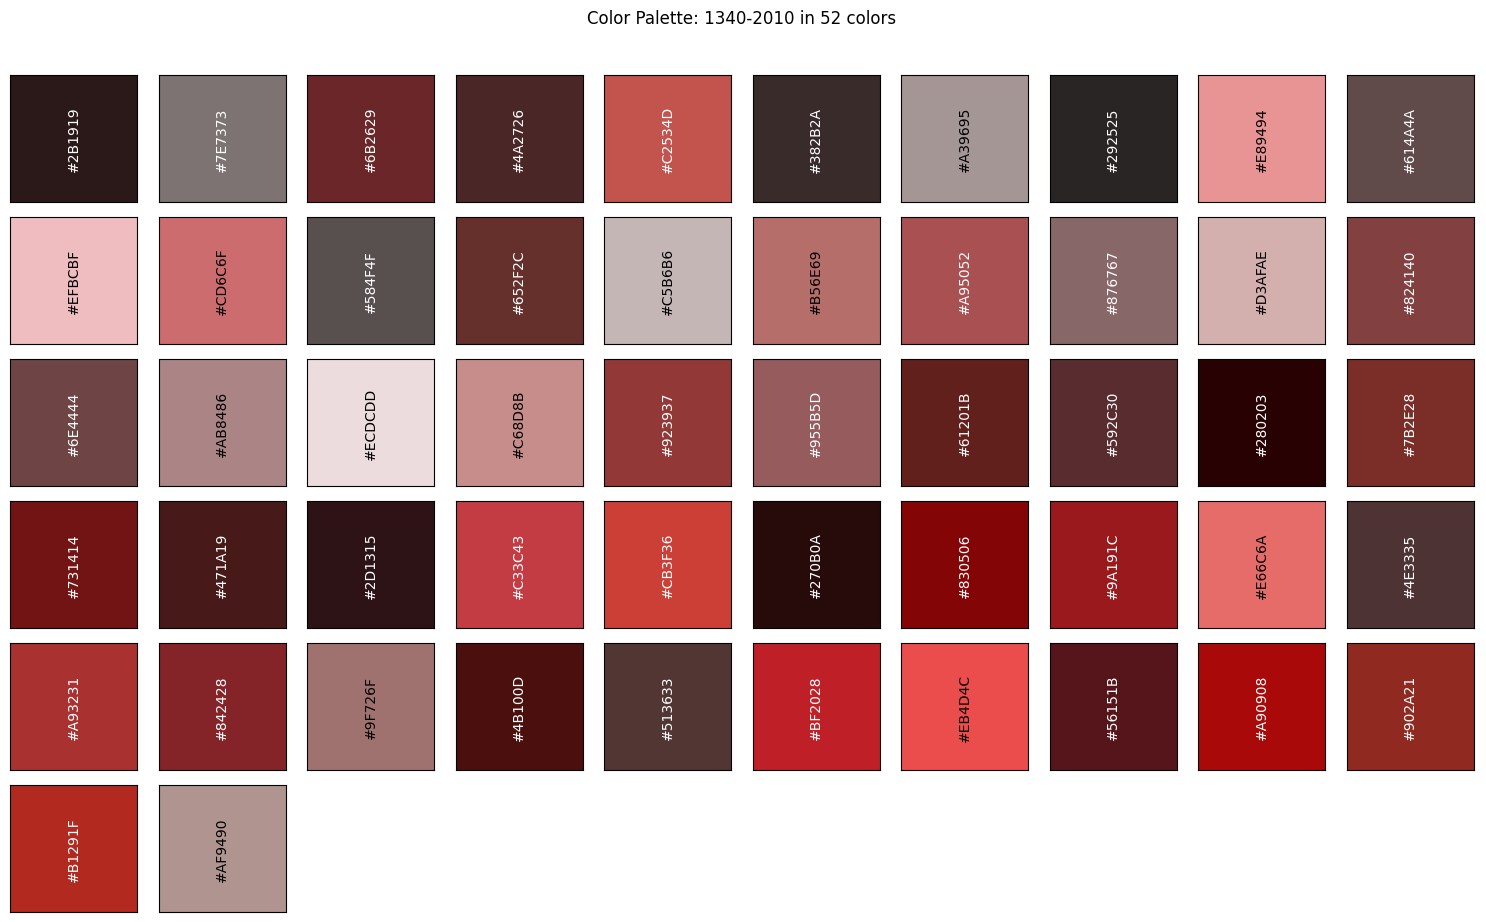

Plot saved to images/color_palettes/1460-2010.png


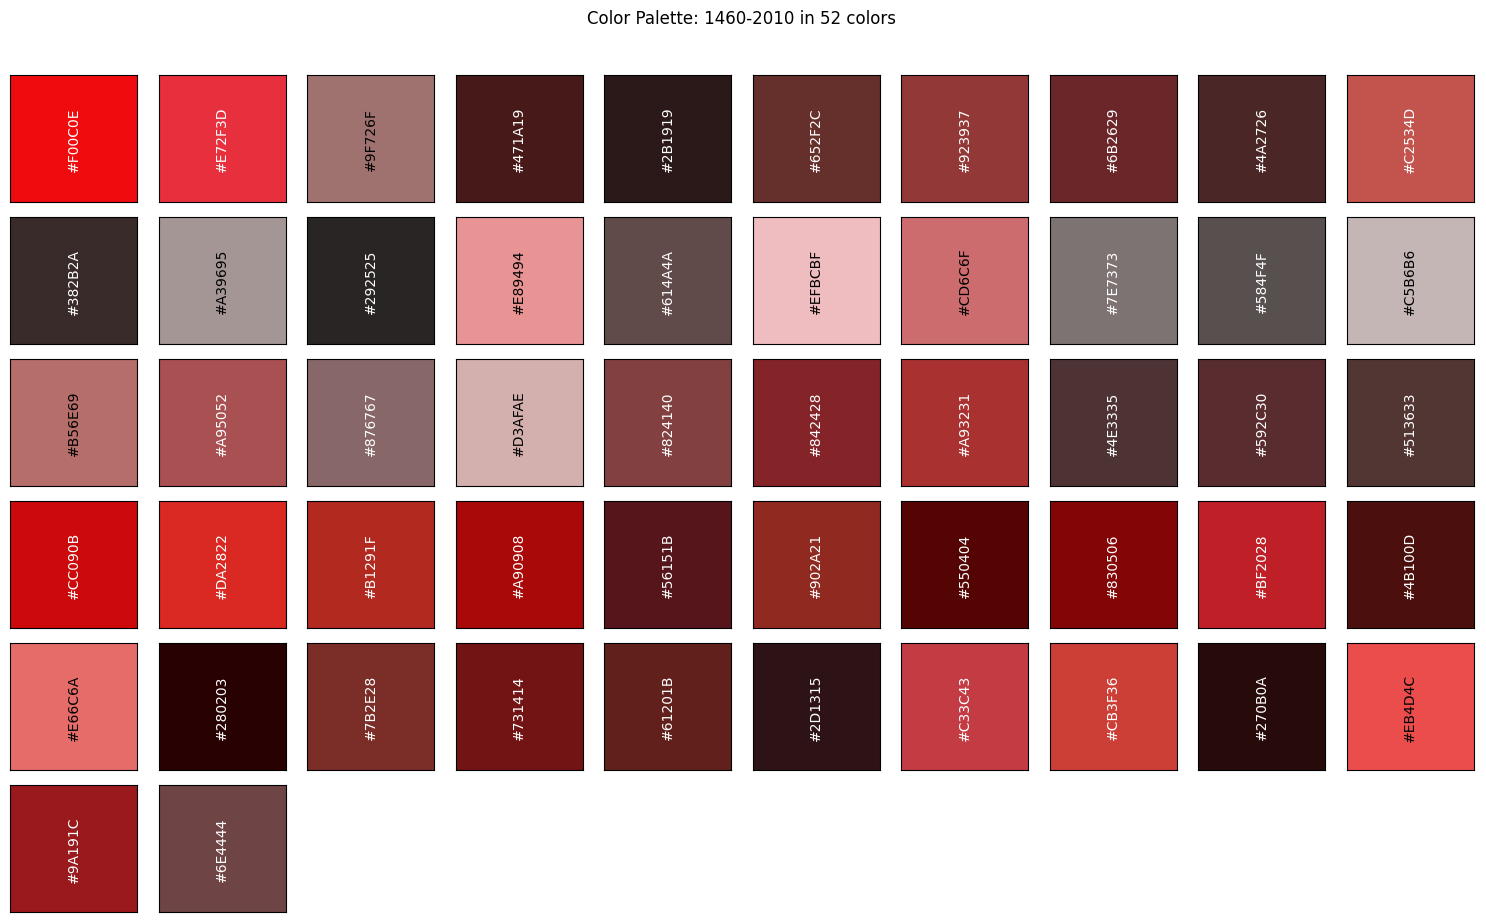

Plot saved to images/color_palettes/1300-2010.png


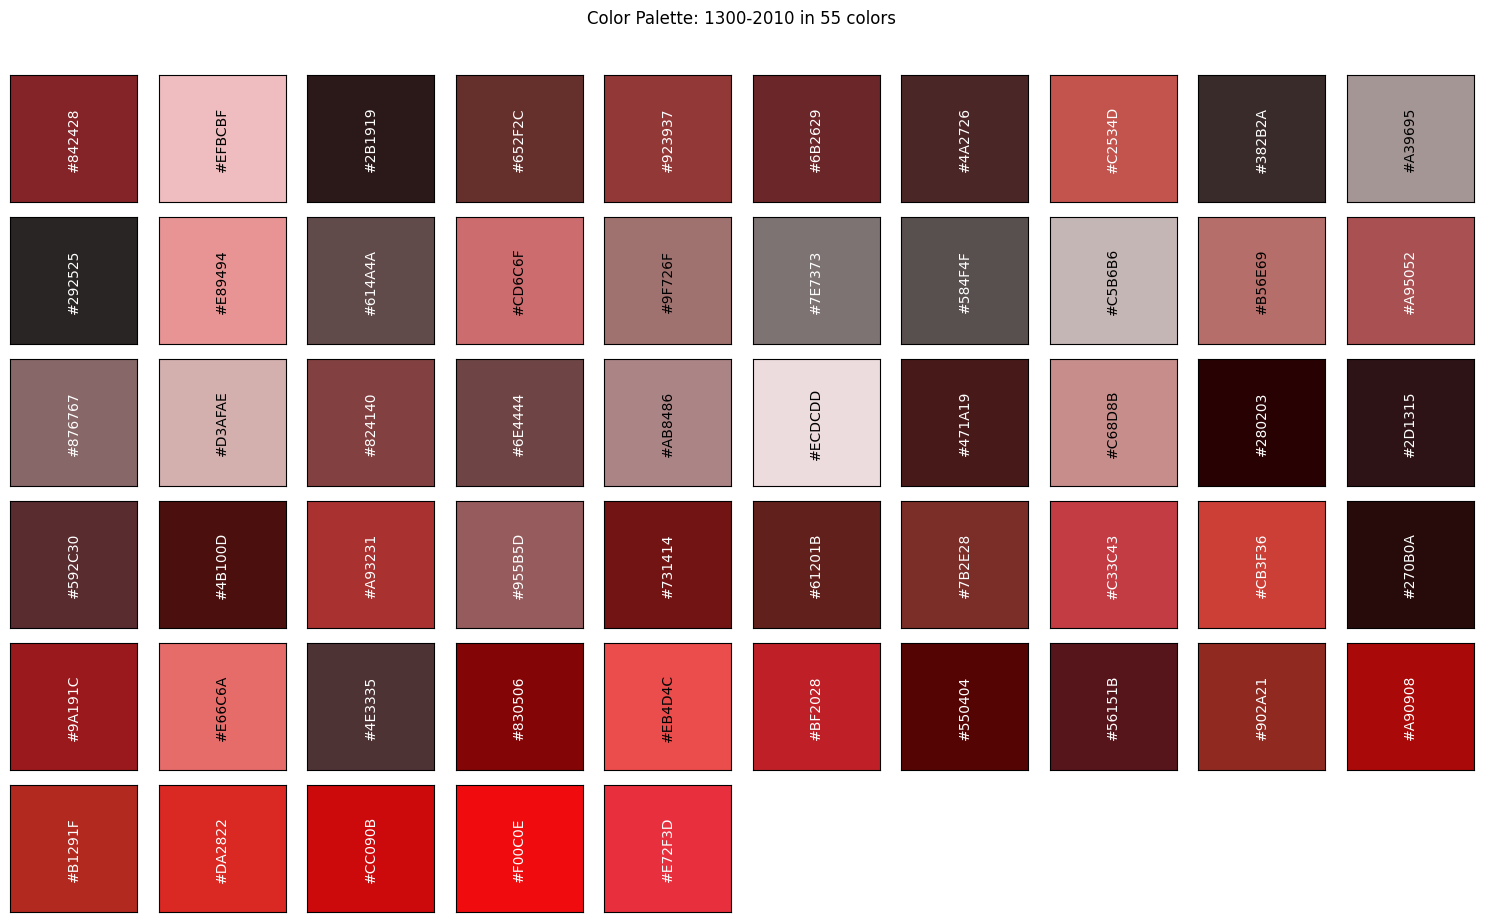

Plot saved to images/color_palettes/1420-2010.png


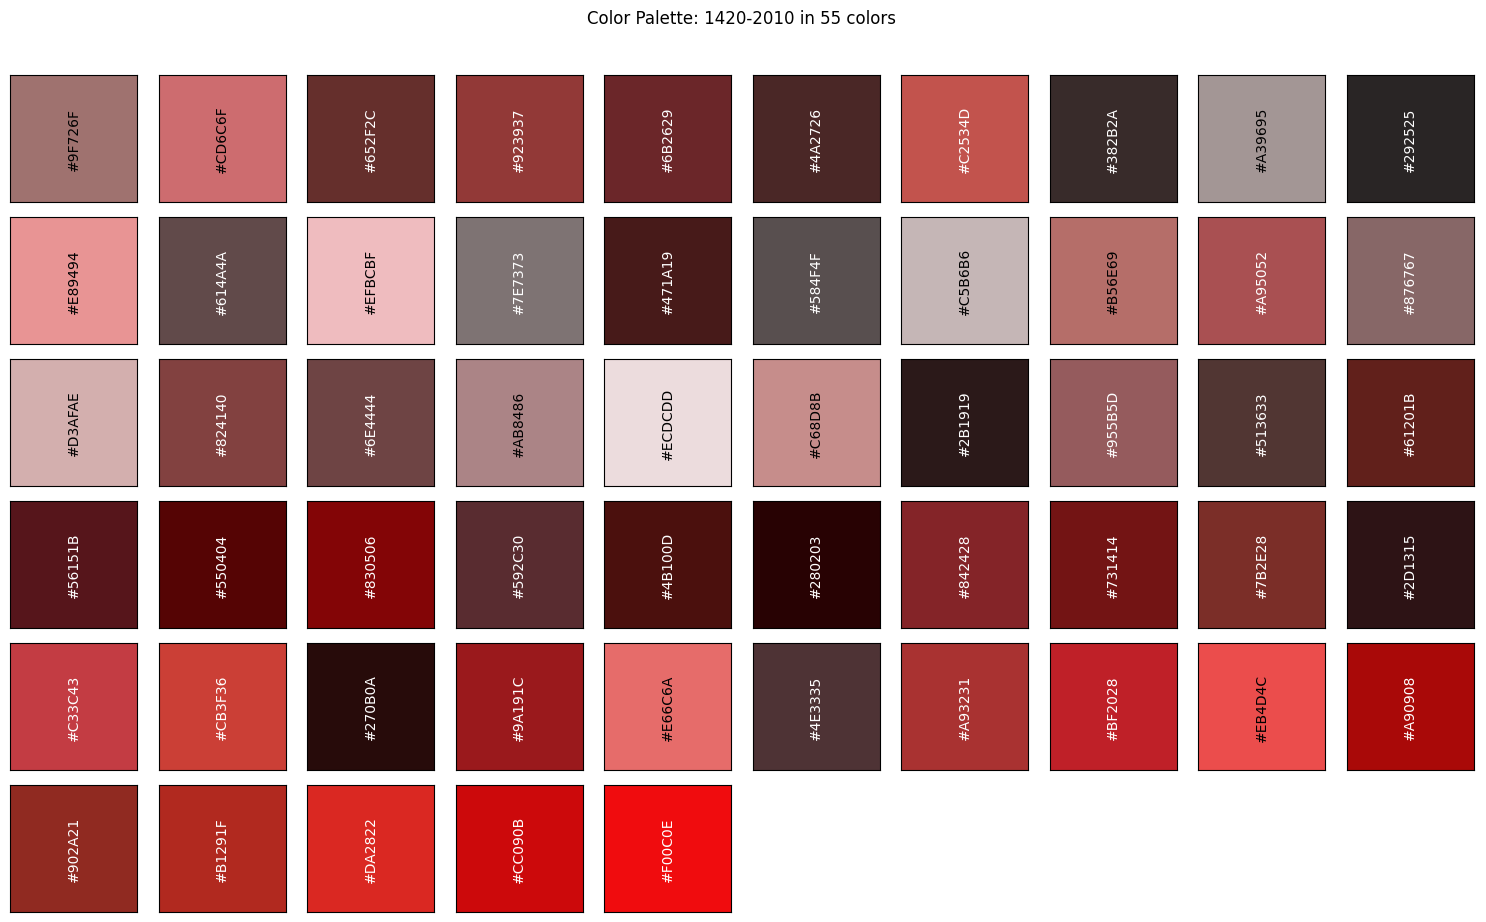

Plot saved to images/color_palettes/1450-2010.png


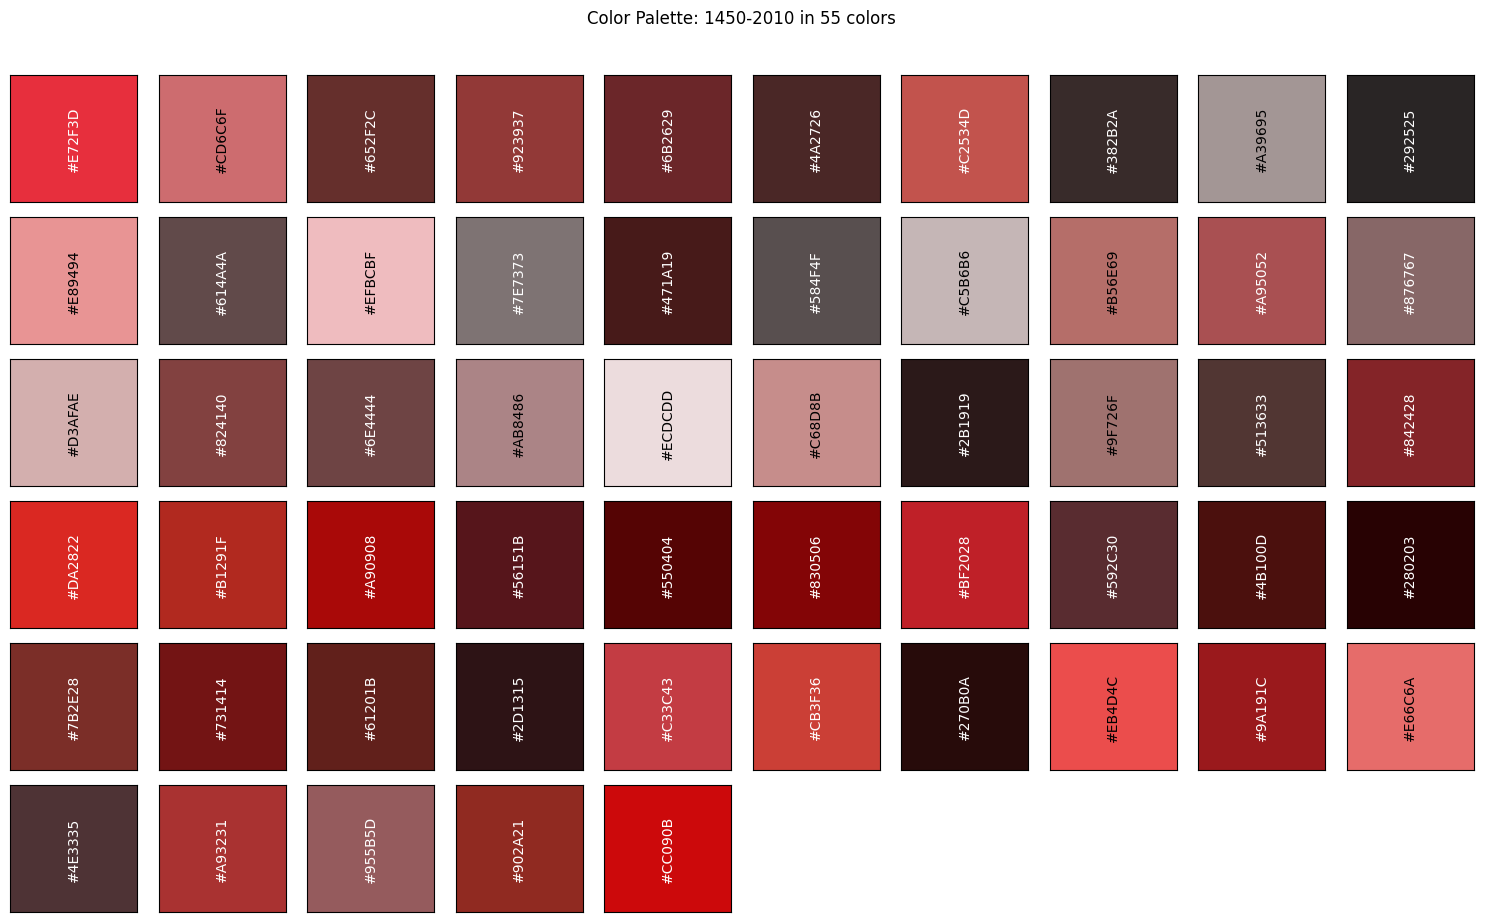

Plot saved to images/color_palettes/1260-2010.png


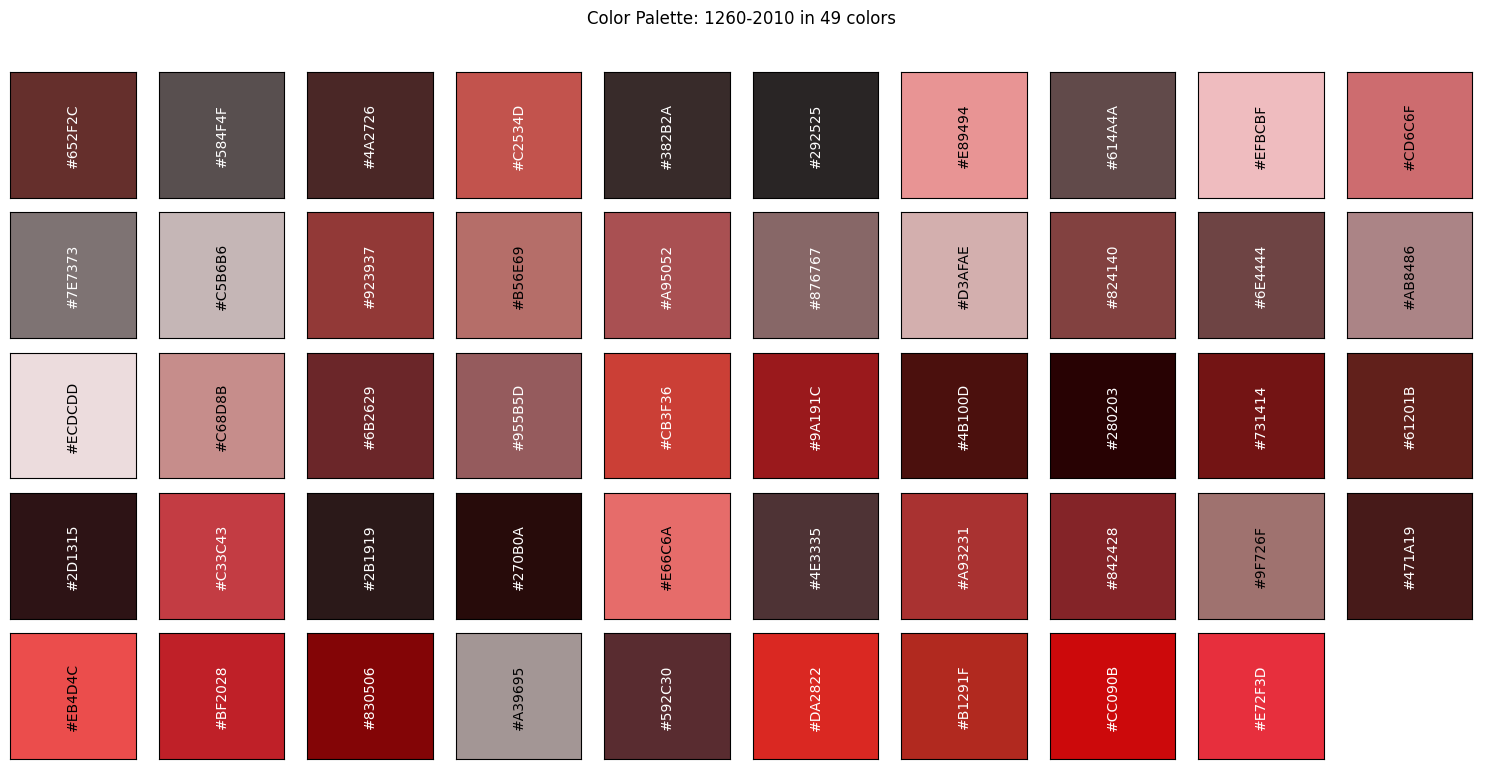

Plot saved to images/color_palettes/1200-2010.png


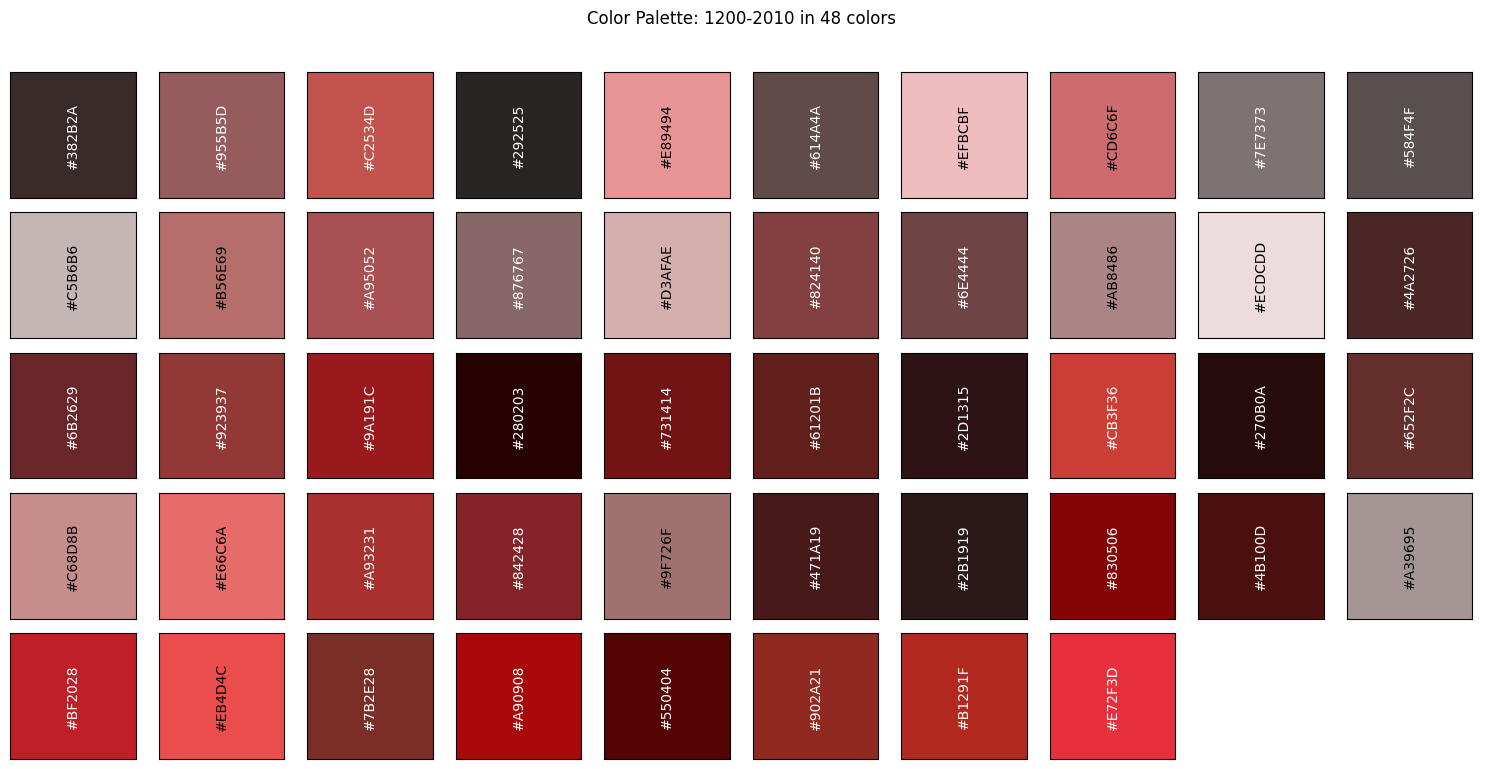

Plot saved to images/color_palettes/1410-2010.png


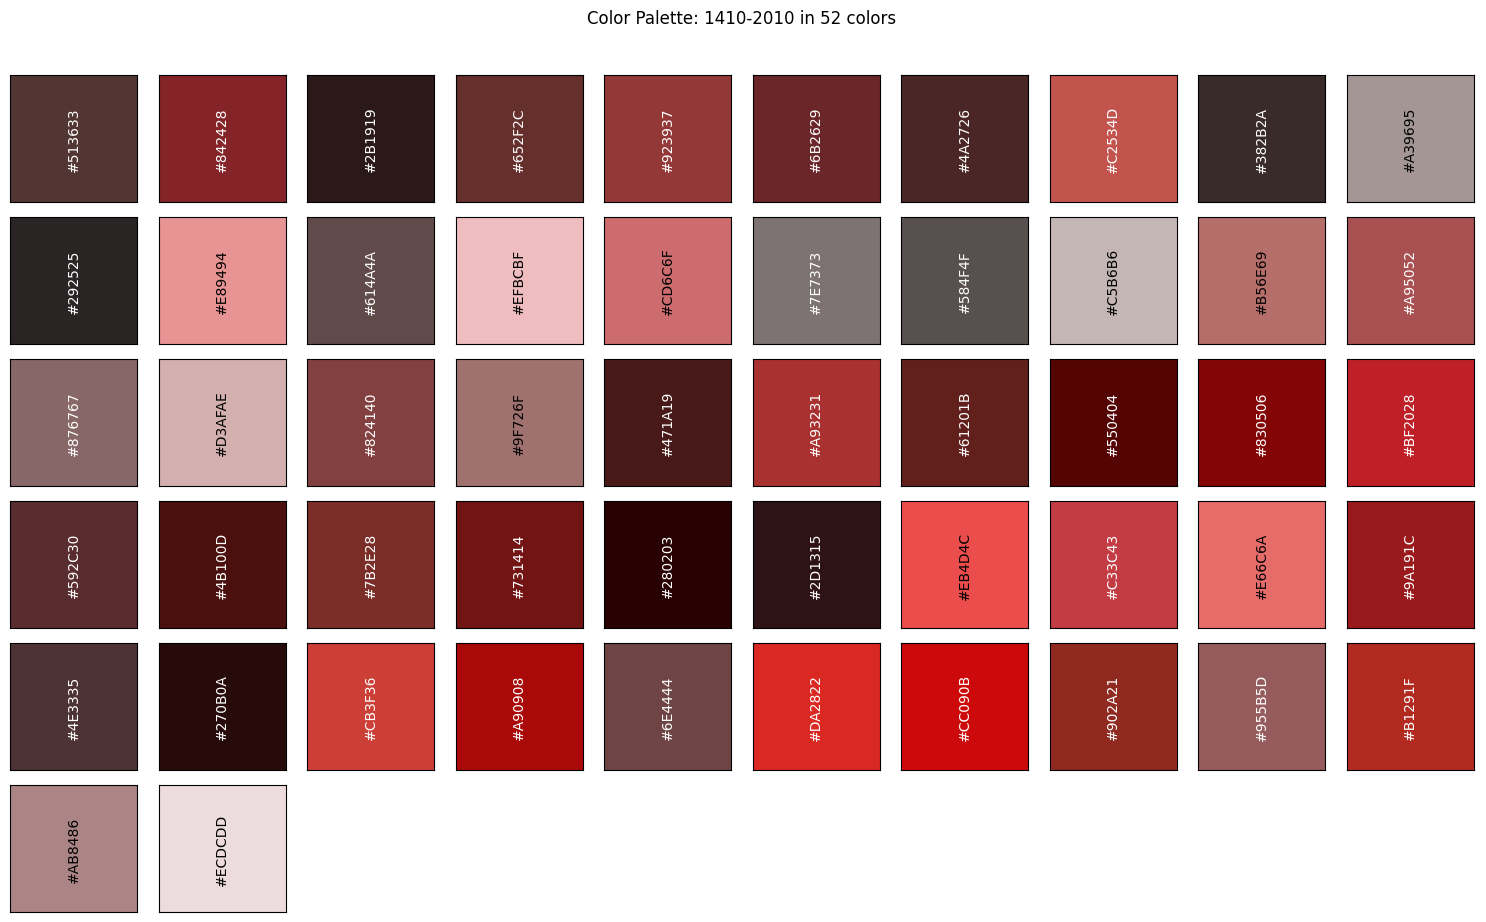

Plot saved to images/color_palettes/1350-2010.png


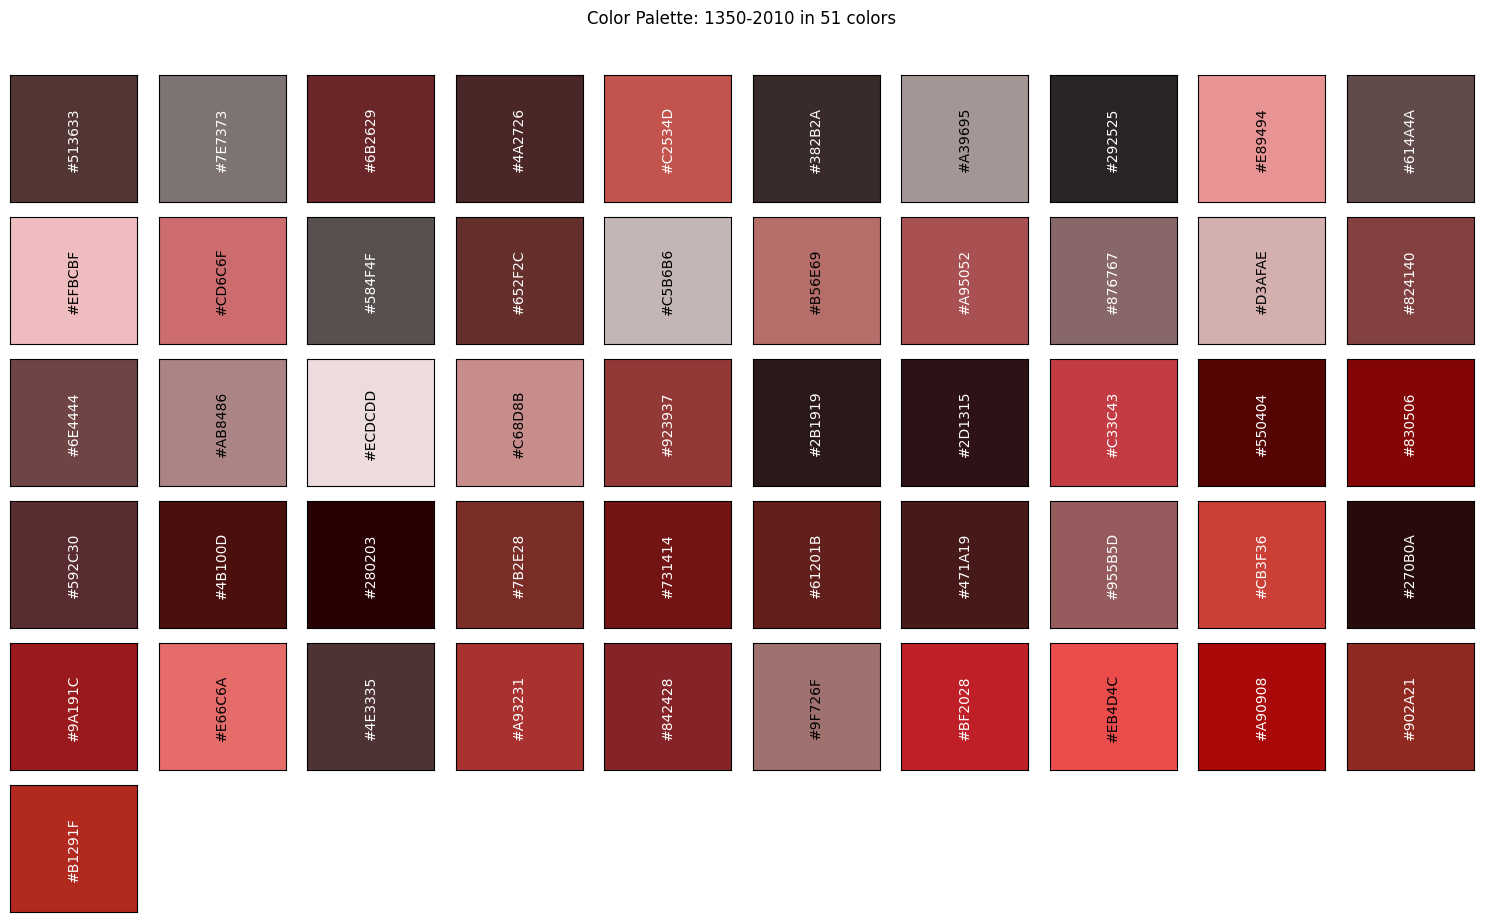

Plot saved to images/color_palettes/1090-2010.png


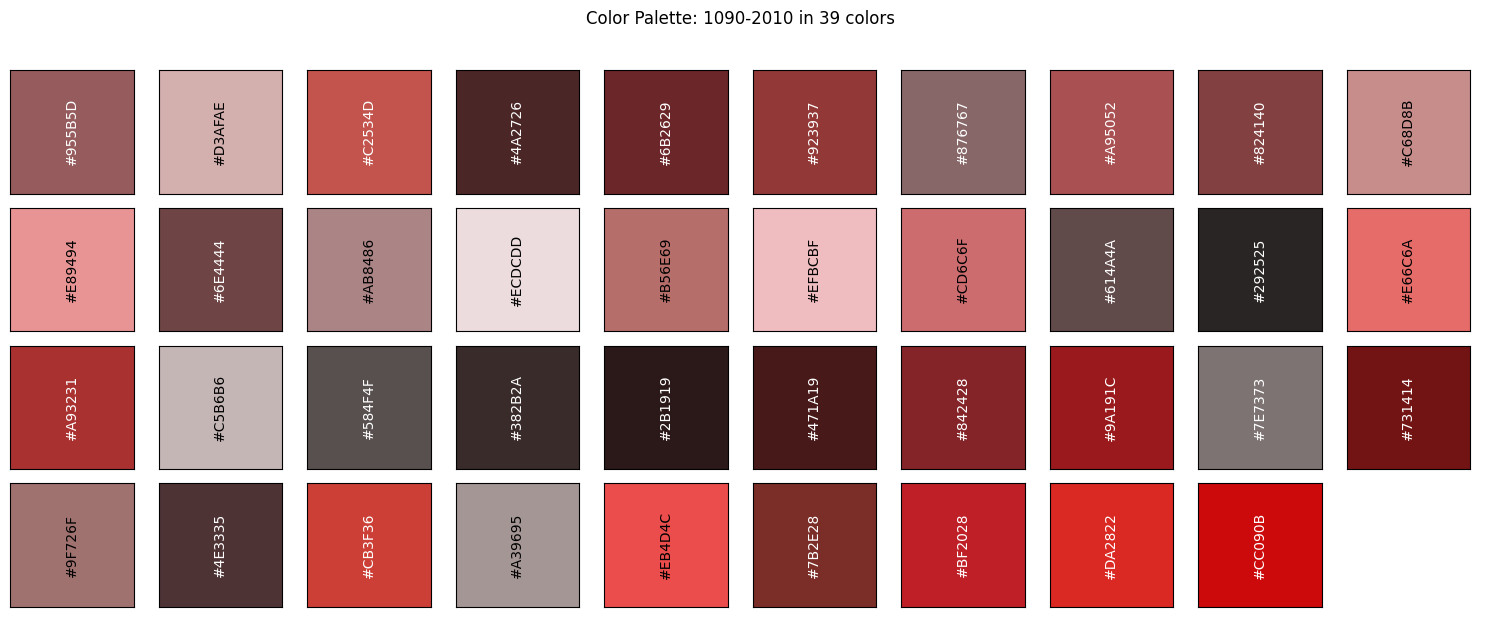

Plot saved to images/color_palettes/1100-2010.png


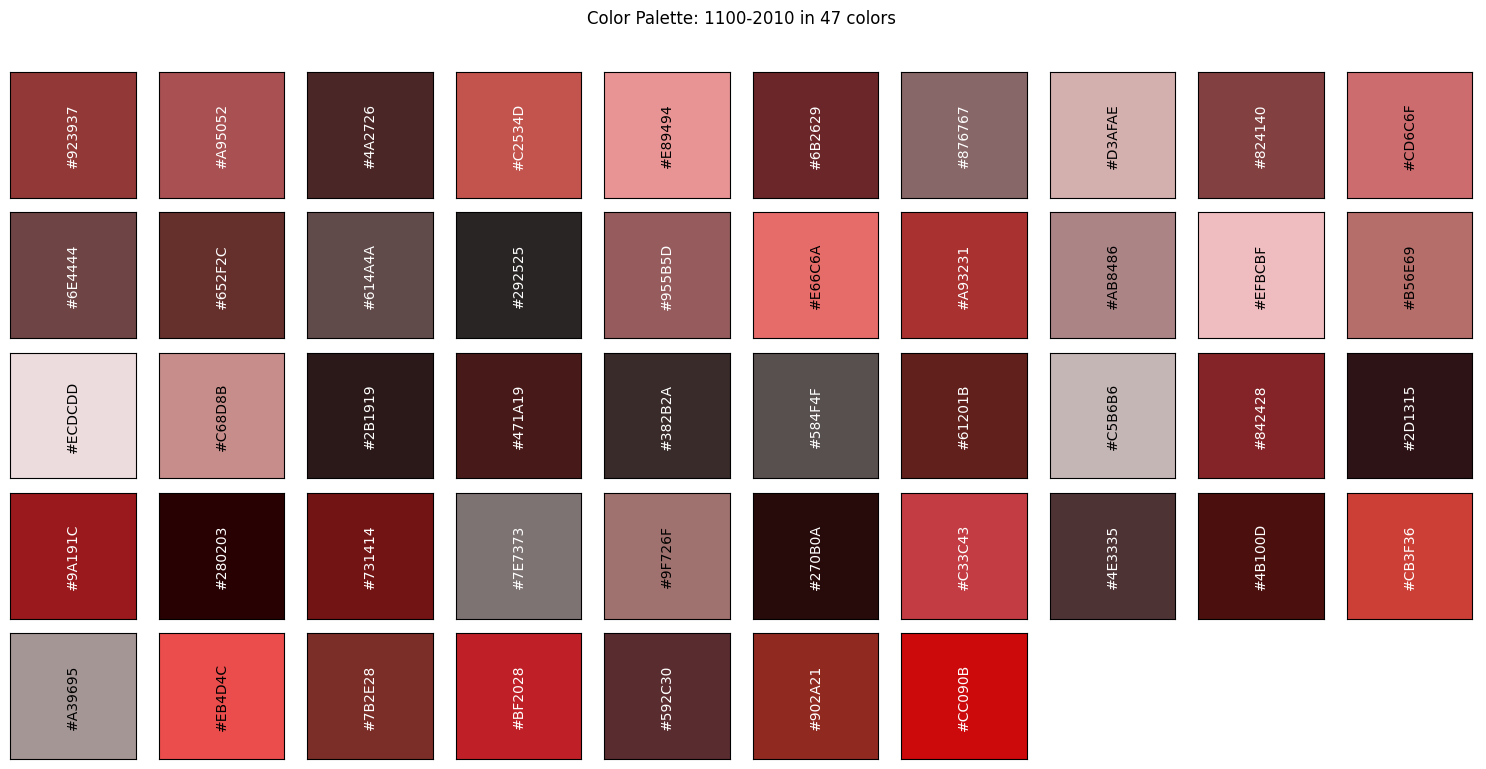

Plot saved to images/color_palettes/970-2010.png


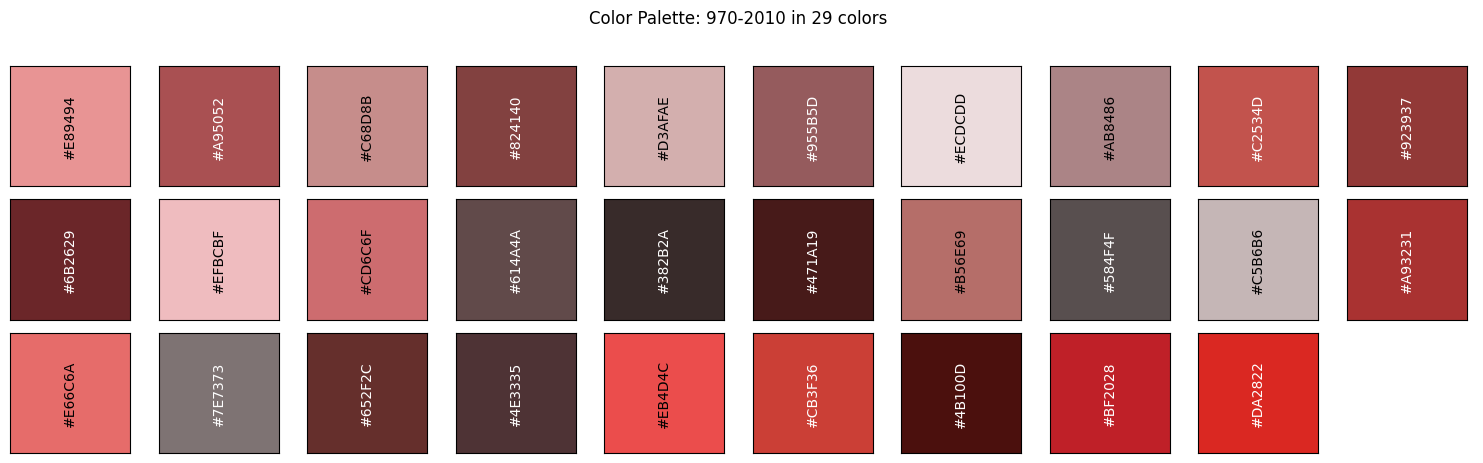

Plot saved to images/color_palettes/1250-2010.png


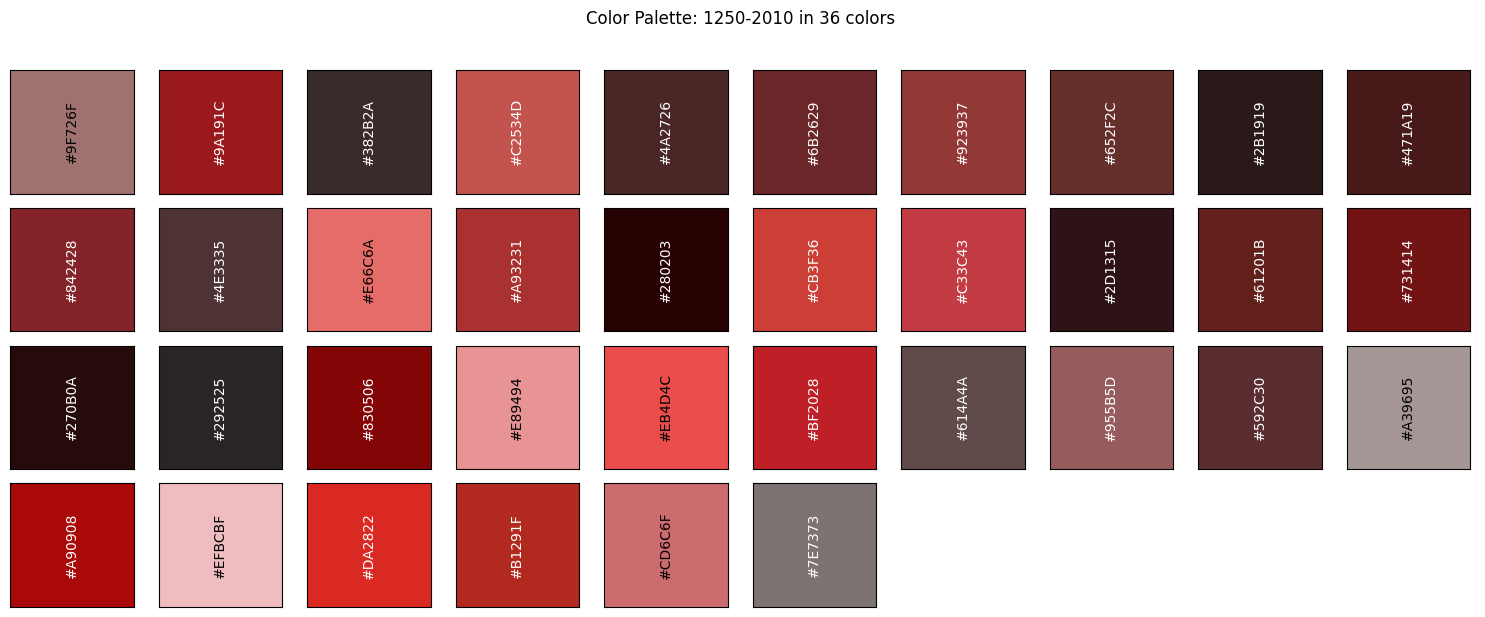

Plot saved to images/color_palettes/1280-2010.png


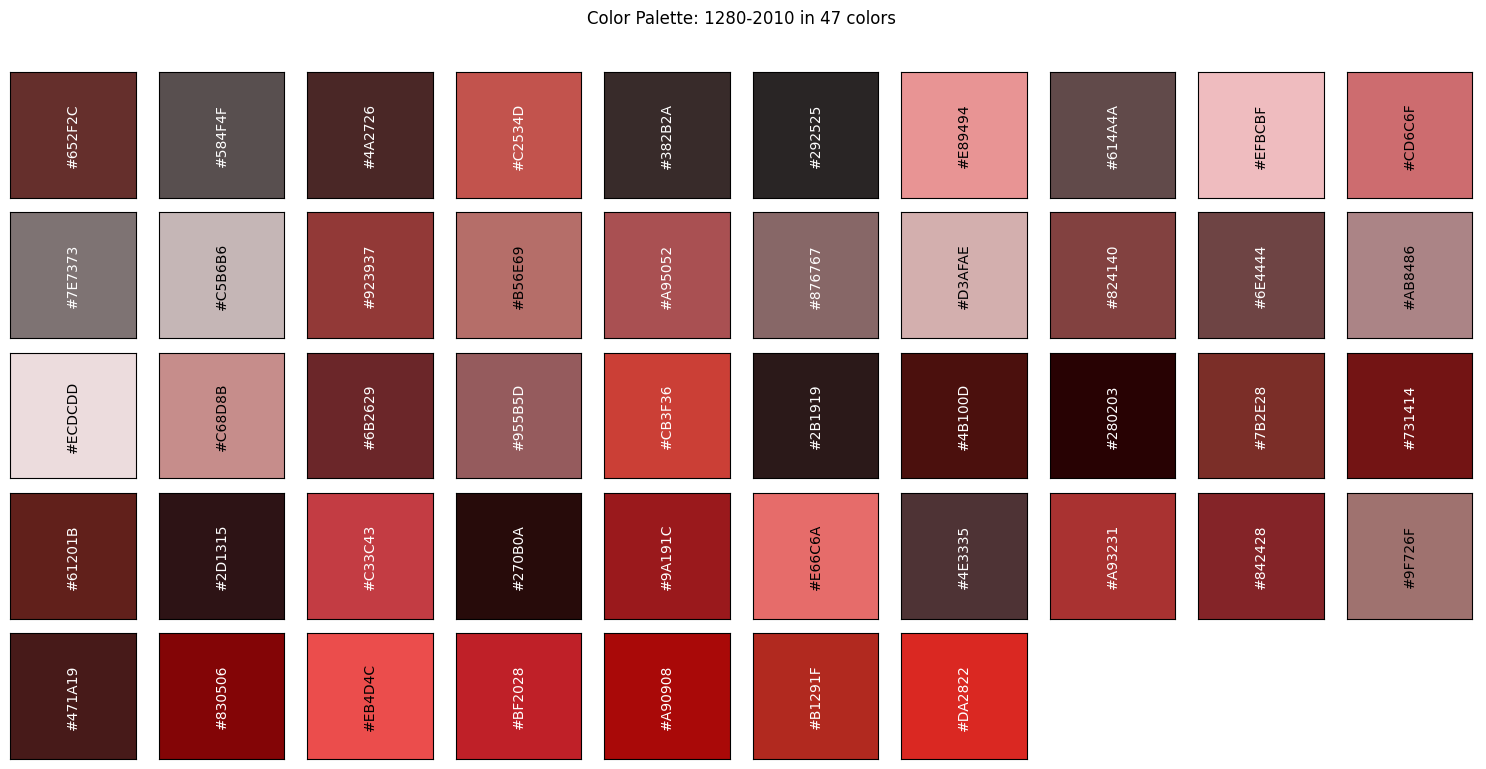

Plot saved to images/color_palettes/1270-2010.png


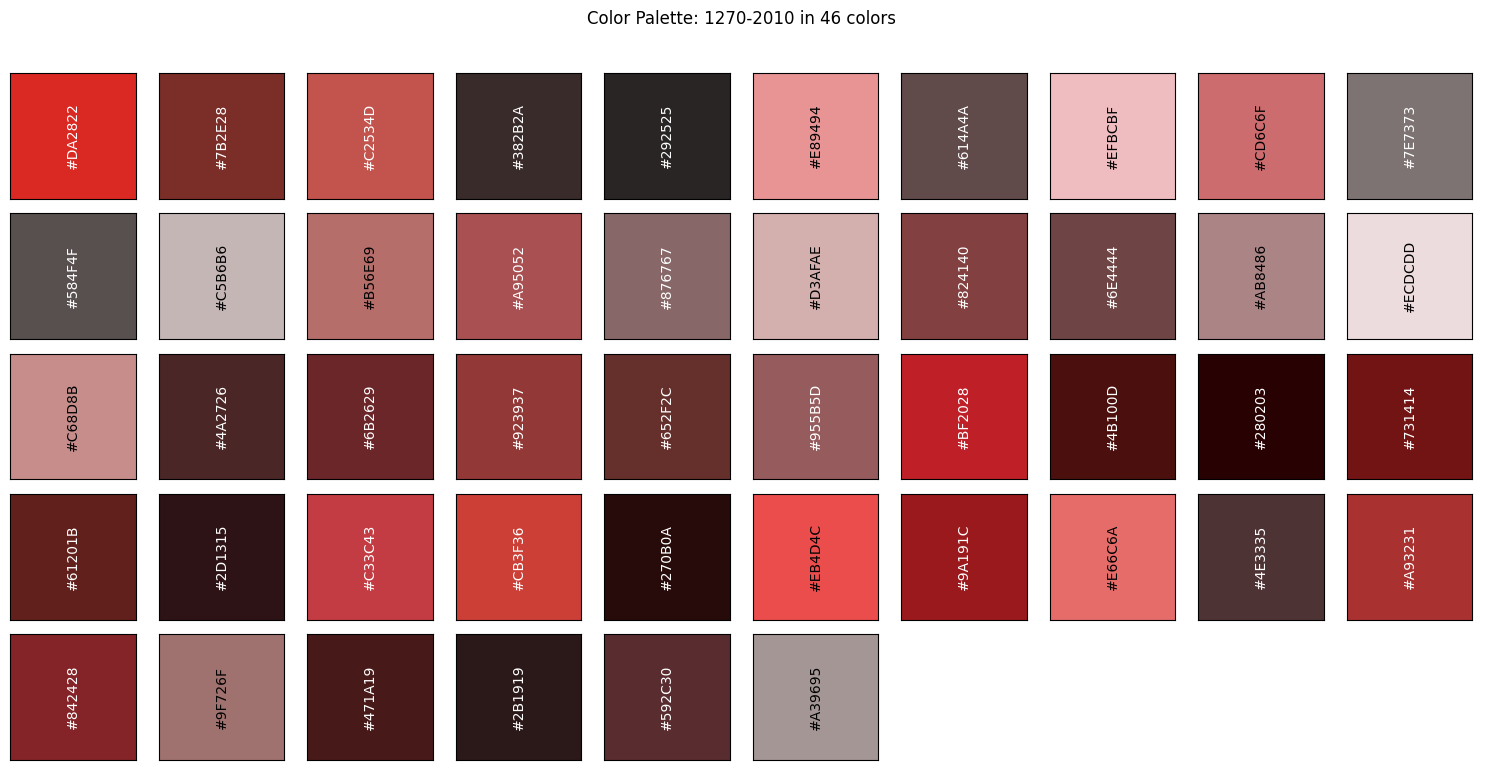

Plot saved to images/color_palettes/1290-2010.png


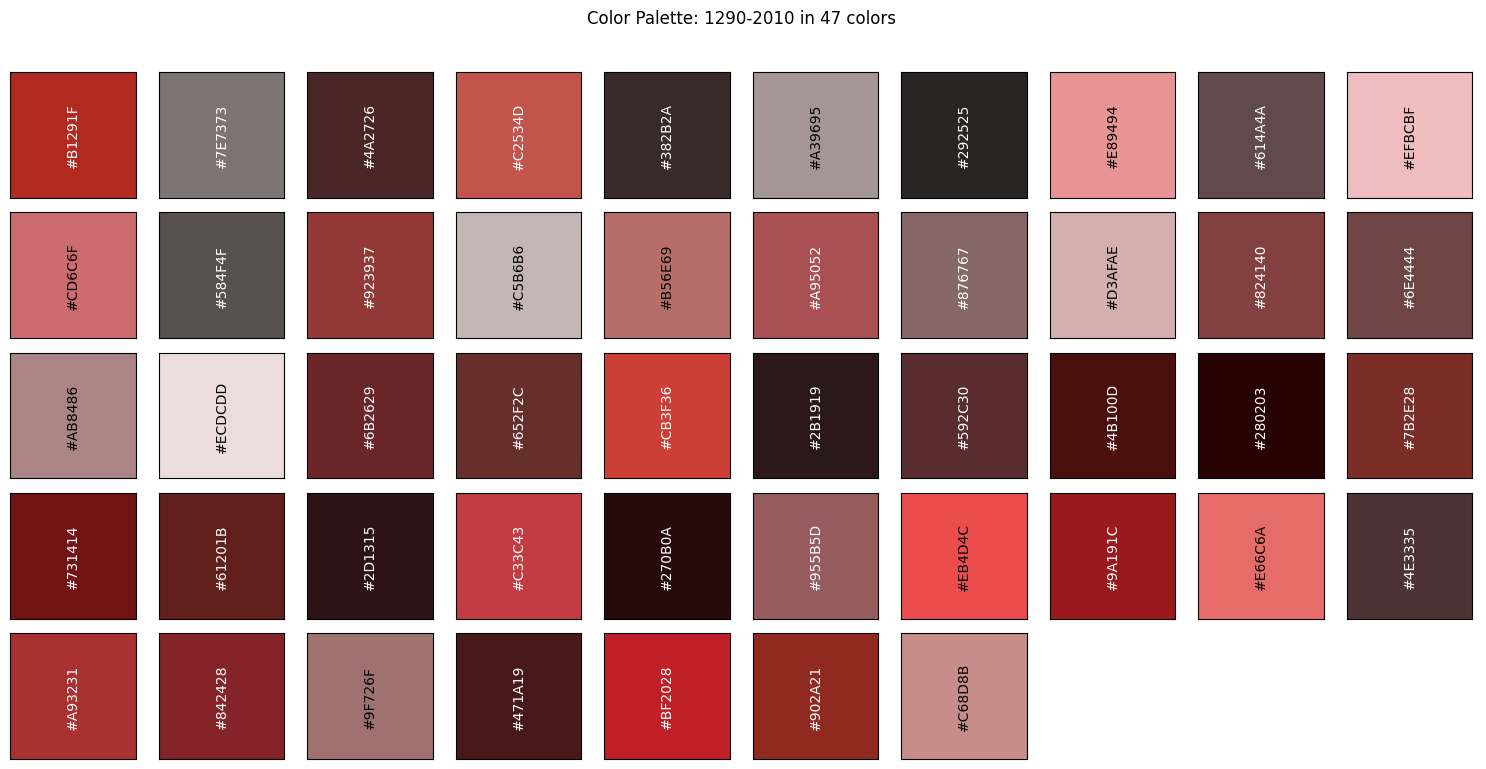

Plot saved to images/color_palettes/1190-2010.png


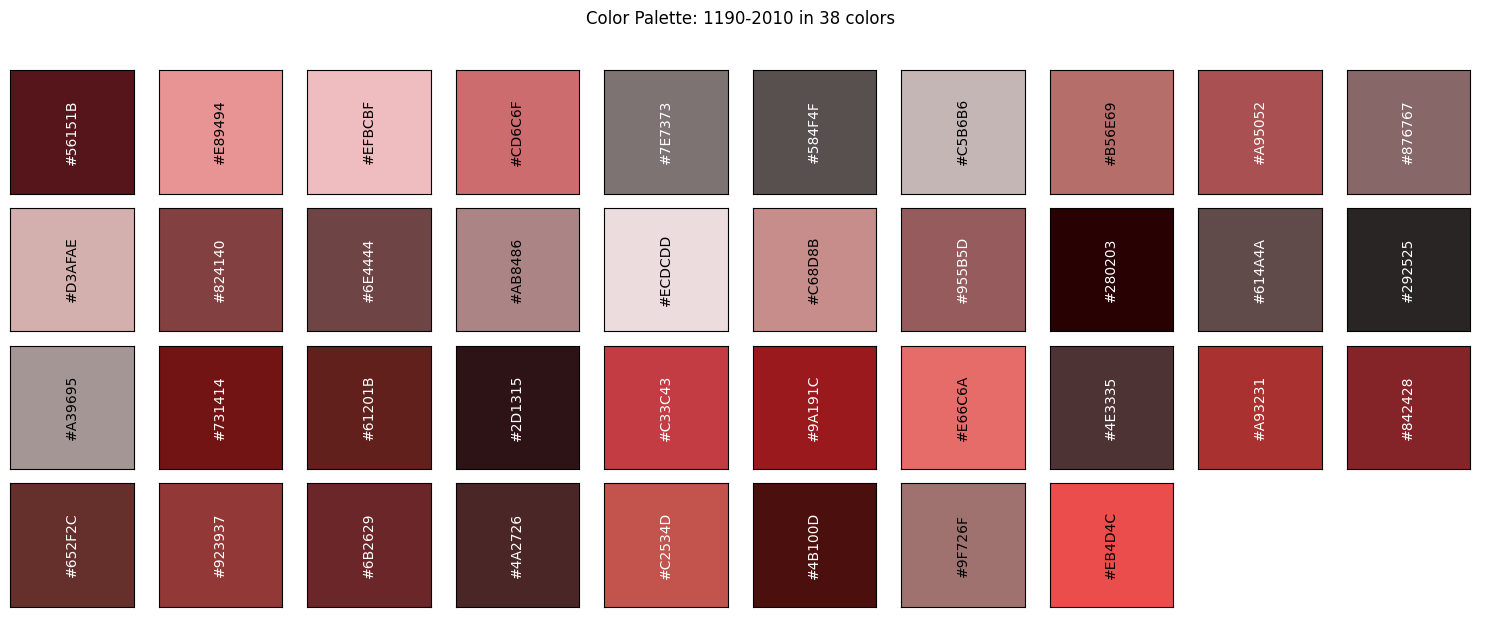

Plot saved to images/color_palettes/1220-2010.png


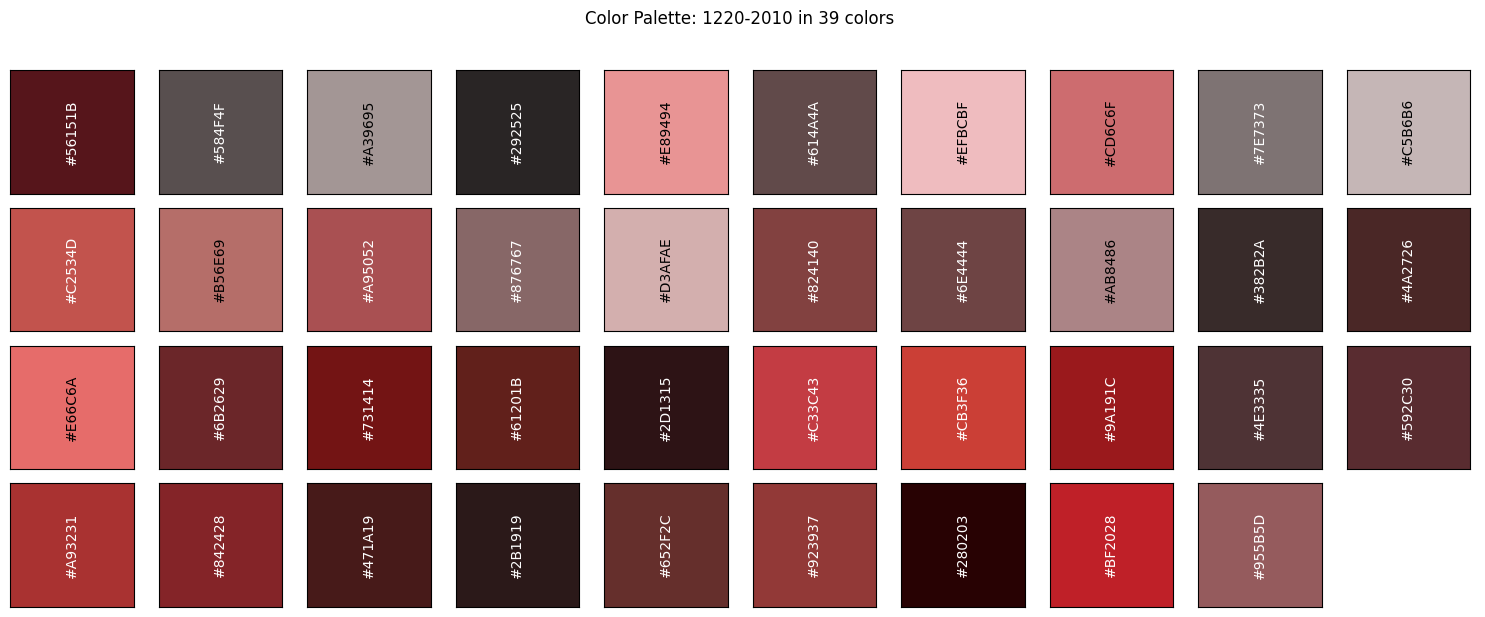

Plot saved to images/color_palettes/1180-2010.png


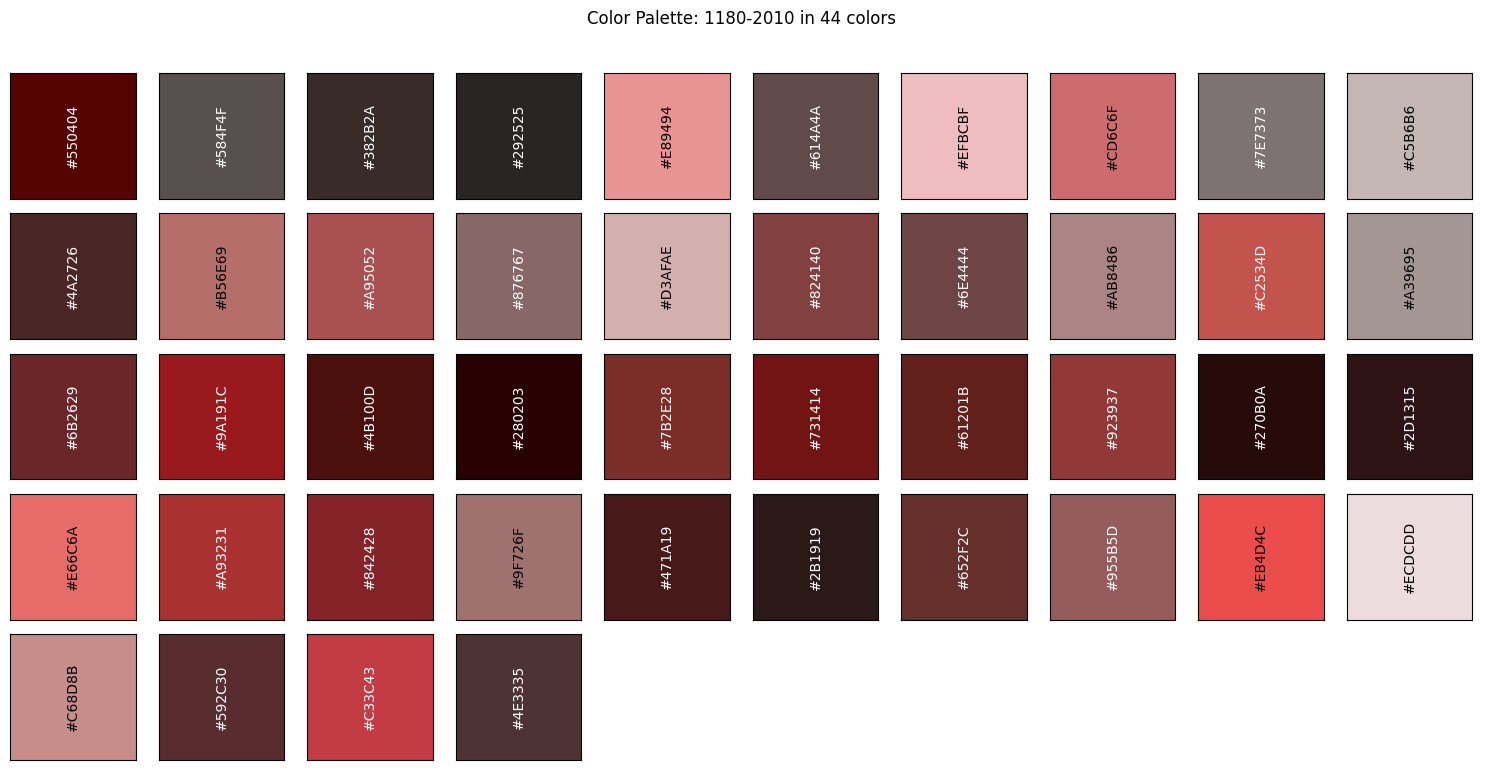

Plot saved to images/color_palettes/770-2010.png


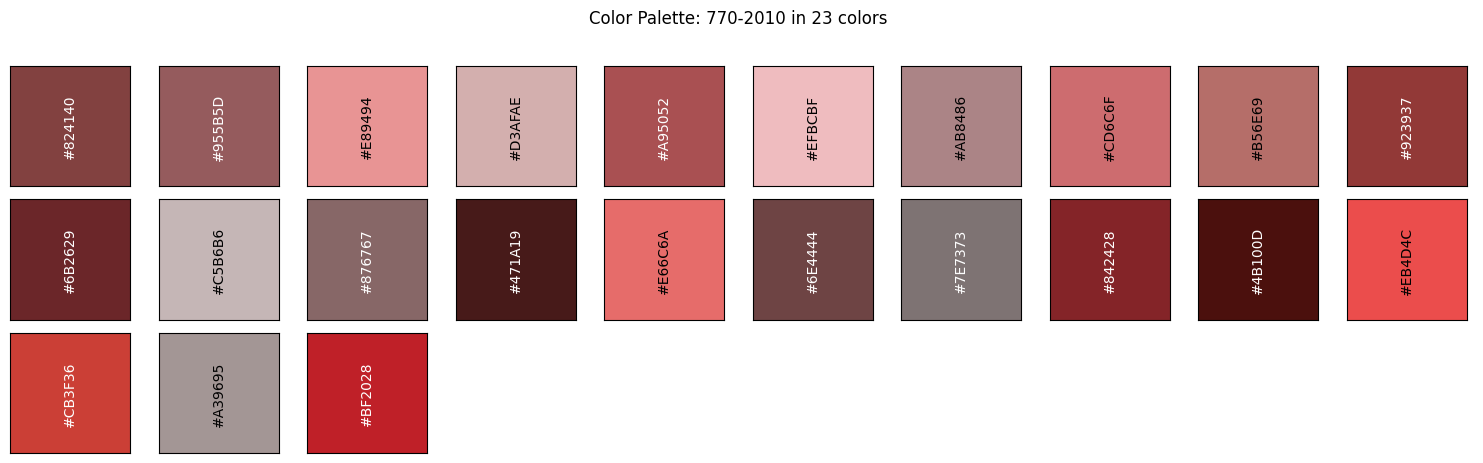

Plot saved to images/color_palettes/900-2010.png


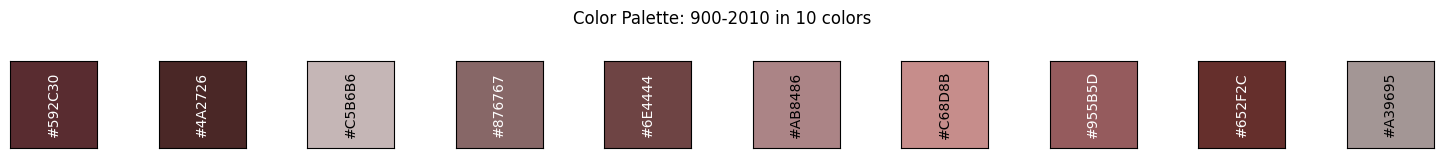

Plot saved to images/color_palettes/-10-2010.png


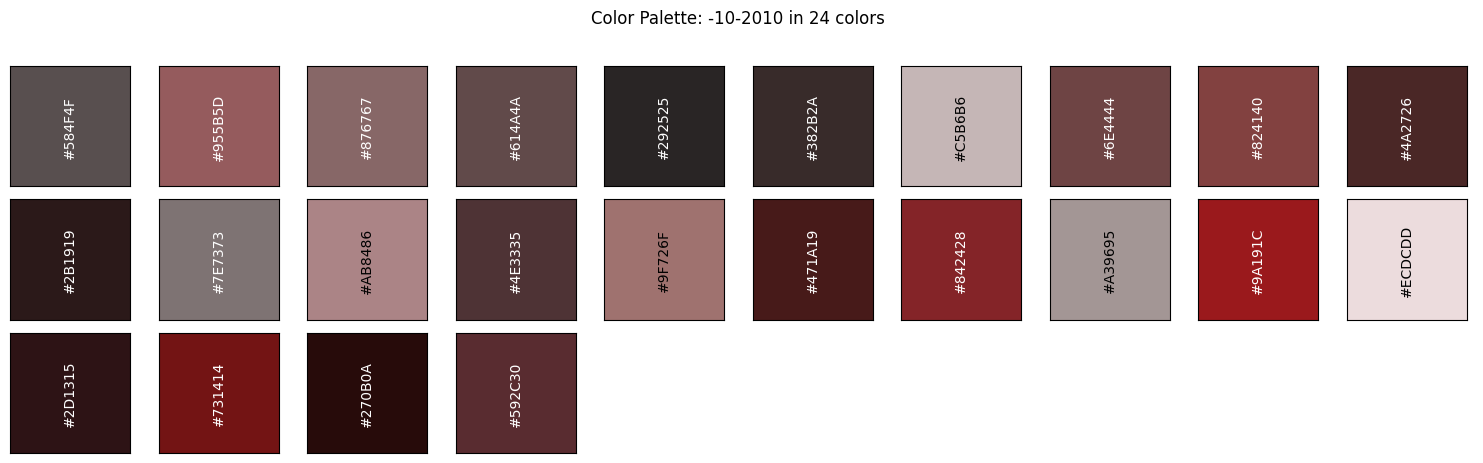

Plot saved to images/color_palettes/-50-2010.png


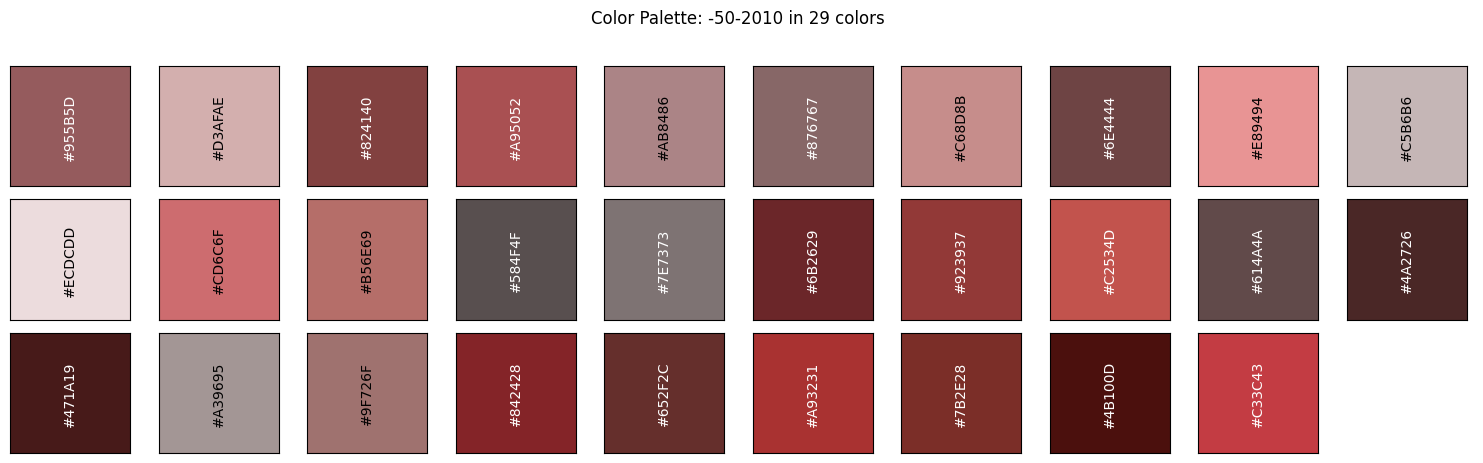

Plot saved to images/color_palettes/0-2010.png


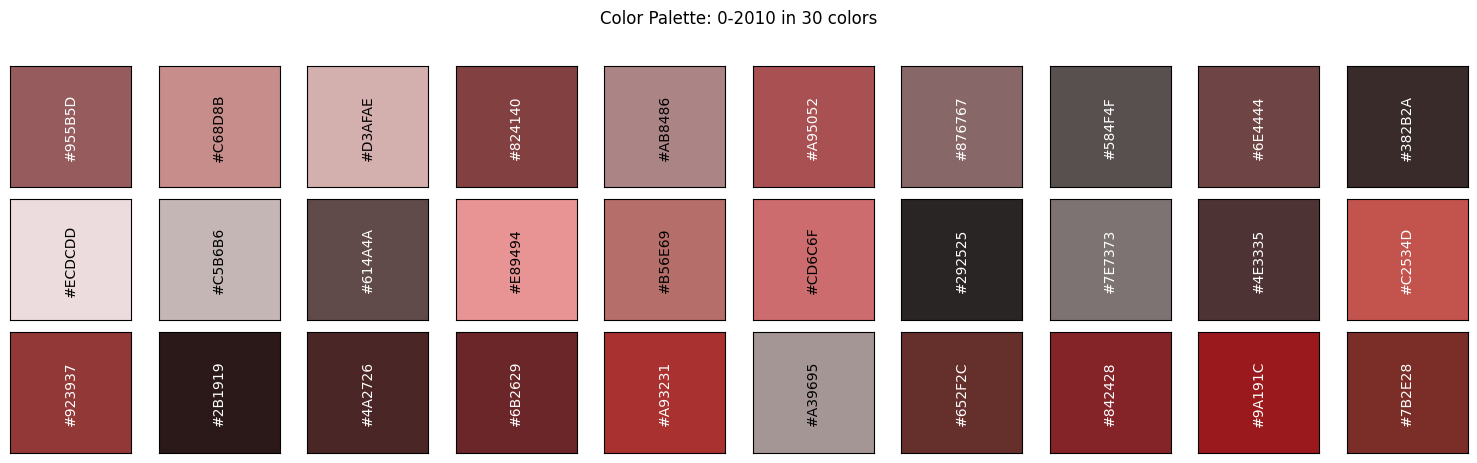

Plot saved to images/color_palettes/750-2010.png


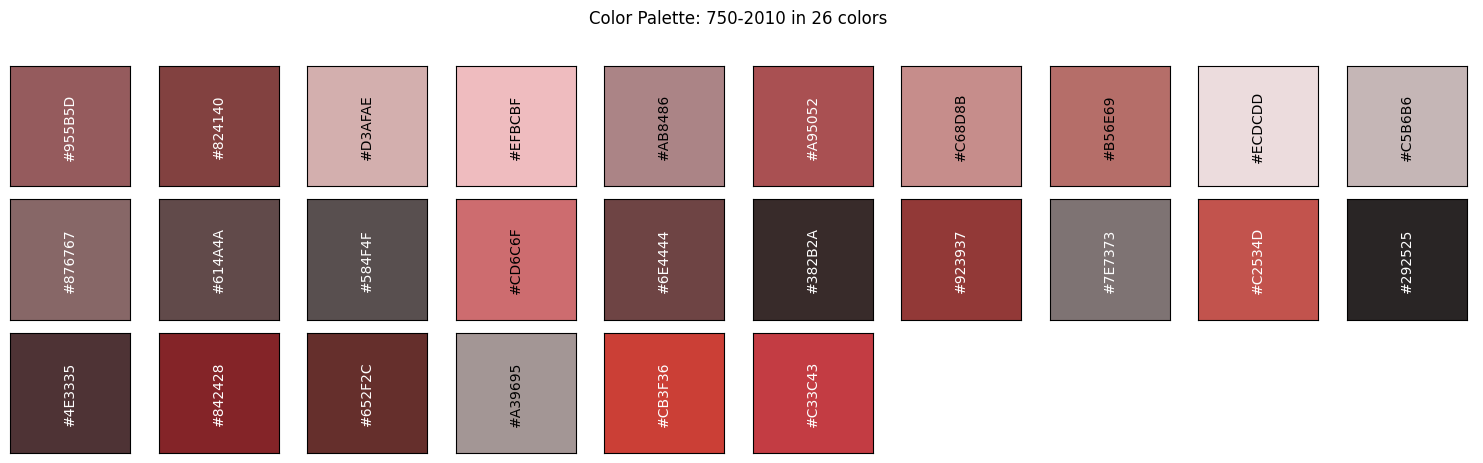

Plot saved to images/color_palettes/150-2010.png


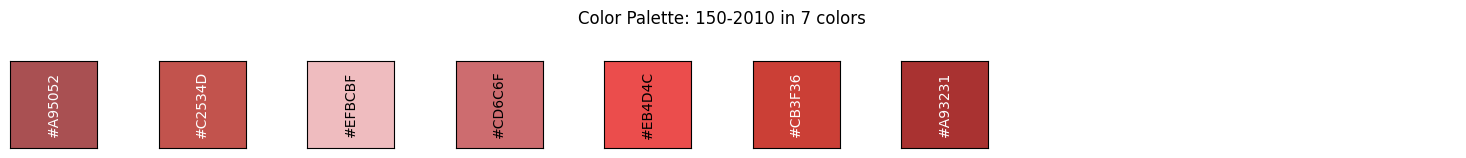

Plot saved to images/color_palettes/400-2010.png


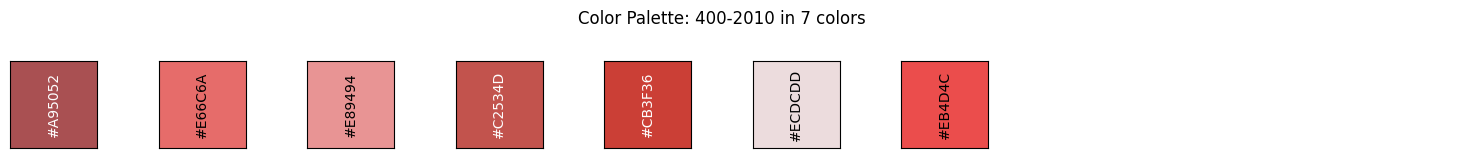

Plot saved to images/color_palettes/1080-2010.png


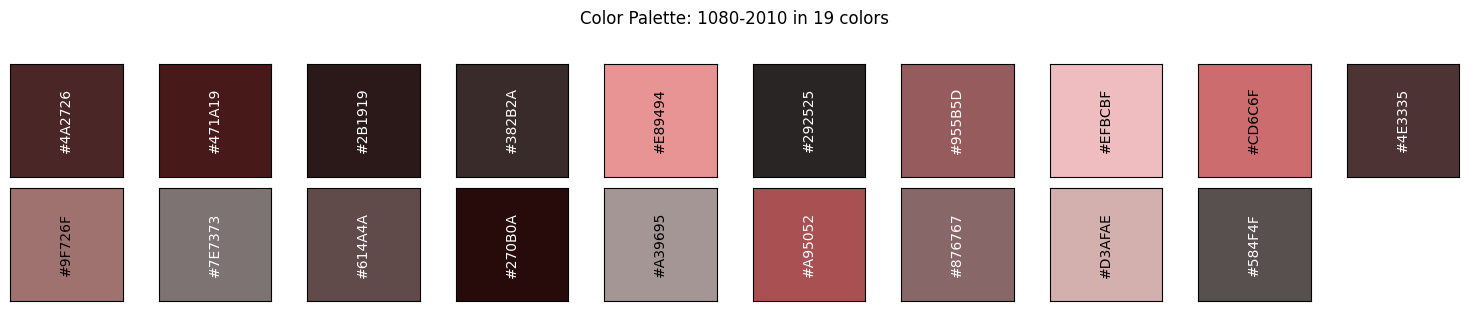

Plot saved to images/color_palettes/100-2010.png


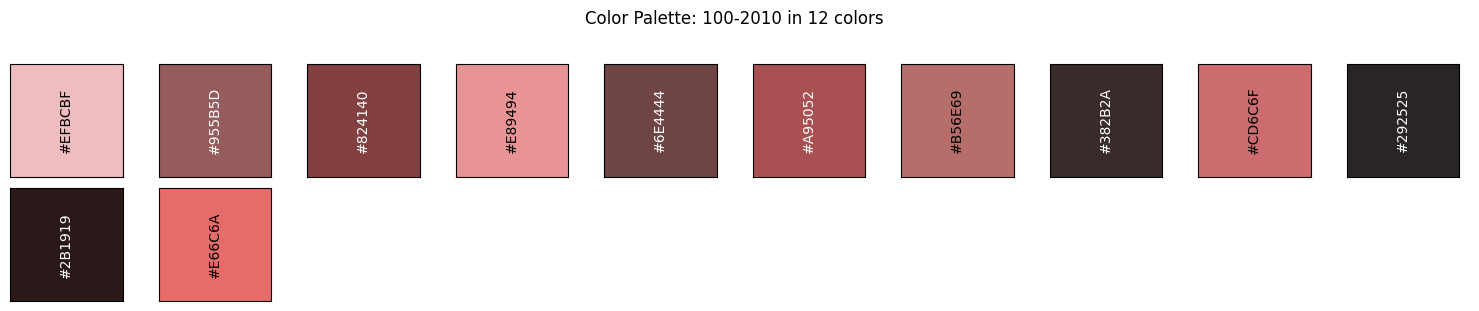

Plot saved to images/color_palettes/710-2010.png


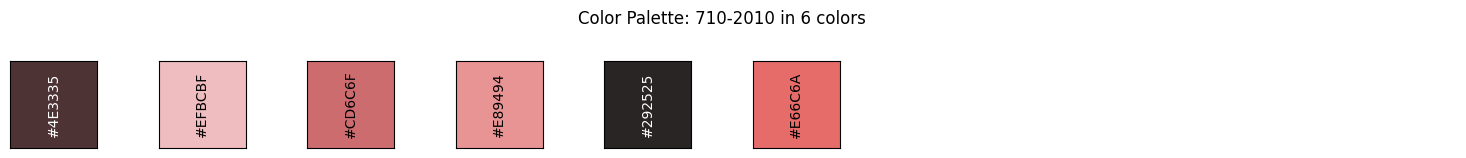

Plot saved to images/color_palettes/590-2010.png


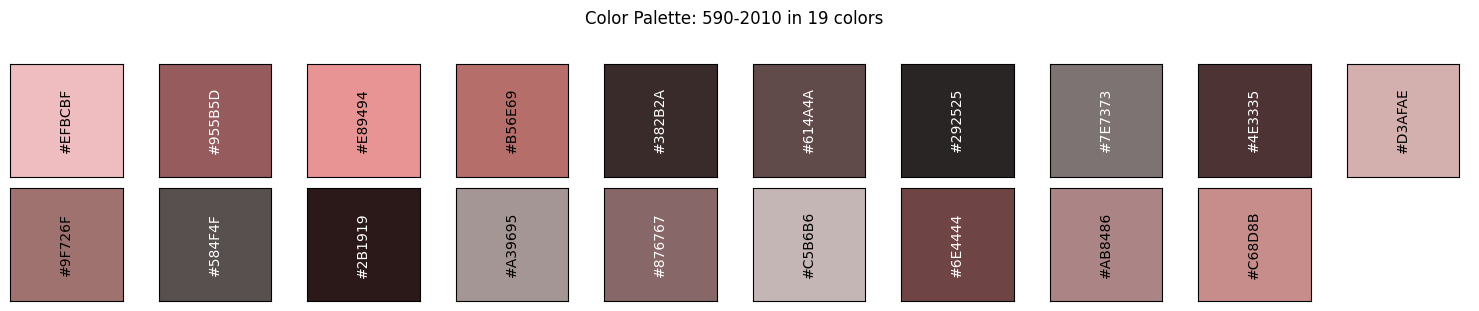

Plot saved to images/color_palettes/960-2010.png


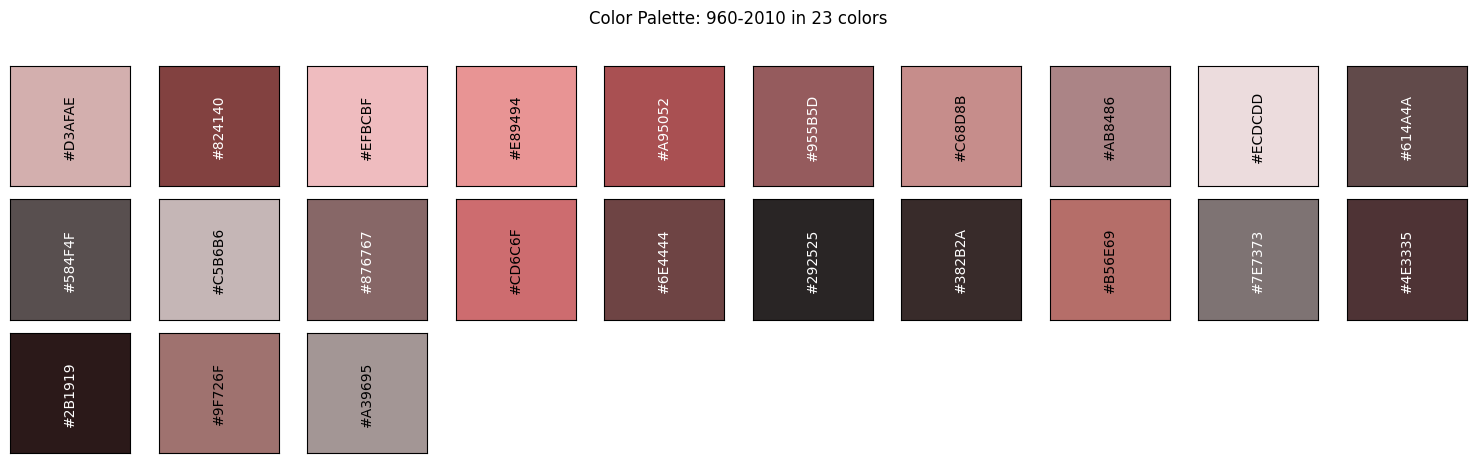

Plot saved to images/color_palettes/820-2010.png


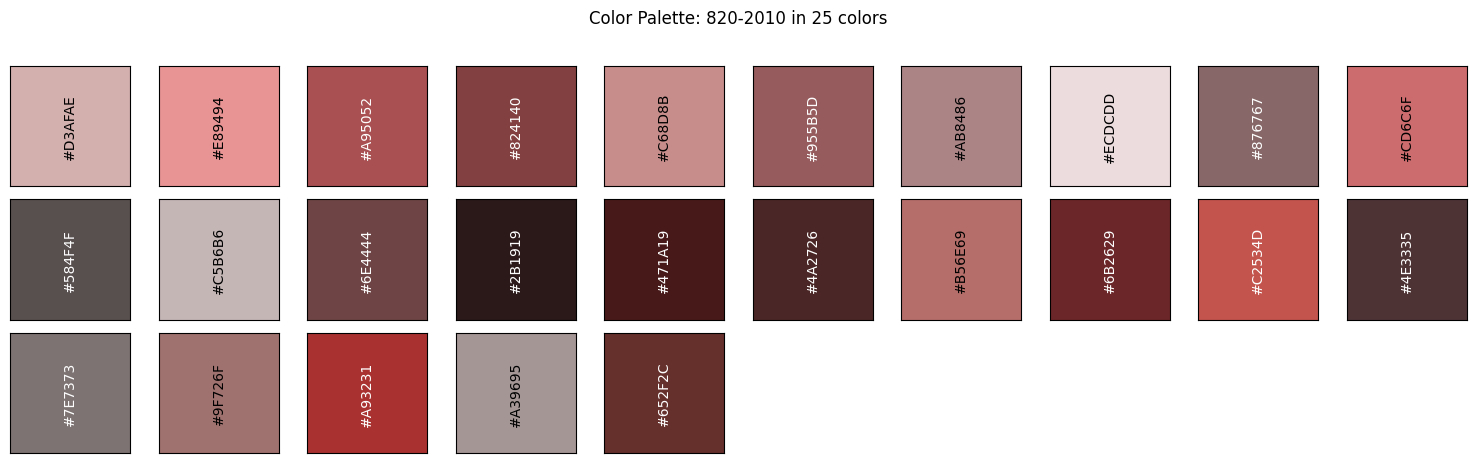

Plot saved to images/color_palettes/250-2010.png


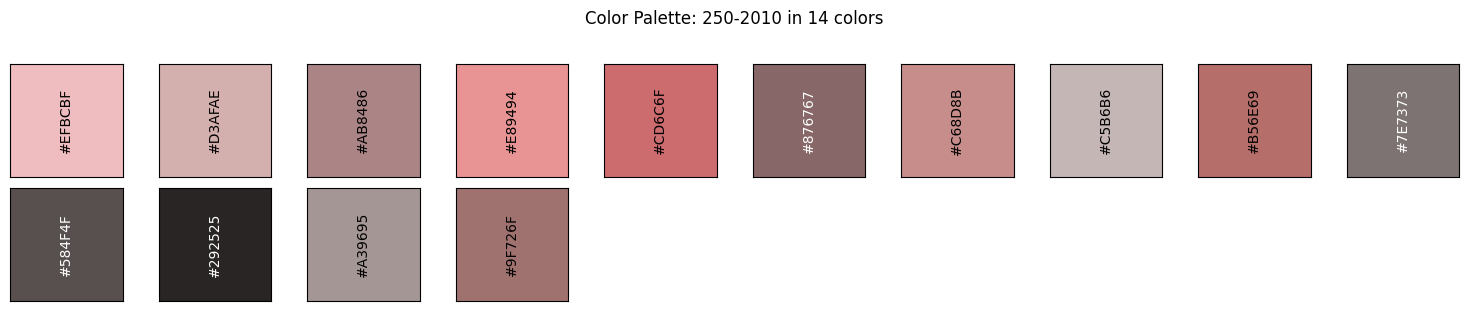

Plot saved to images/color_palettes/1000-2010.png


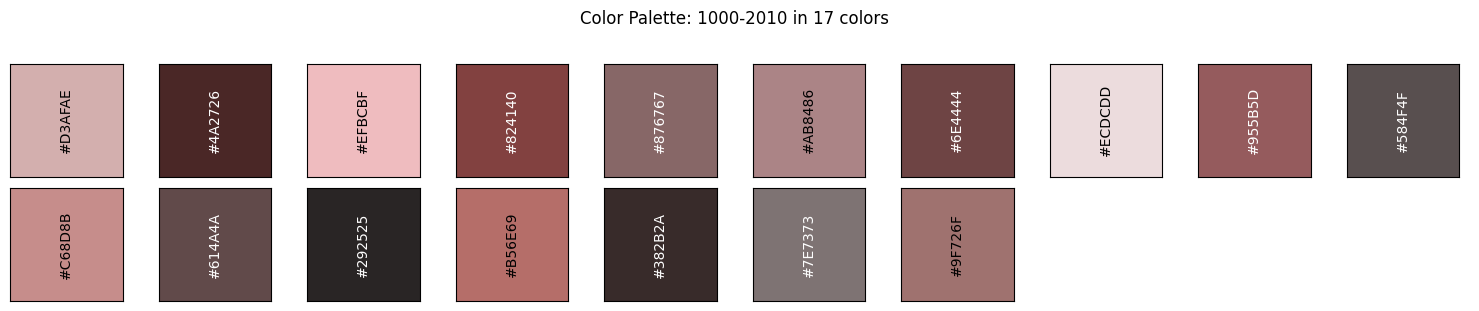

Plot saved to images/color_palettes/-380-2010.png


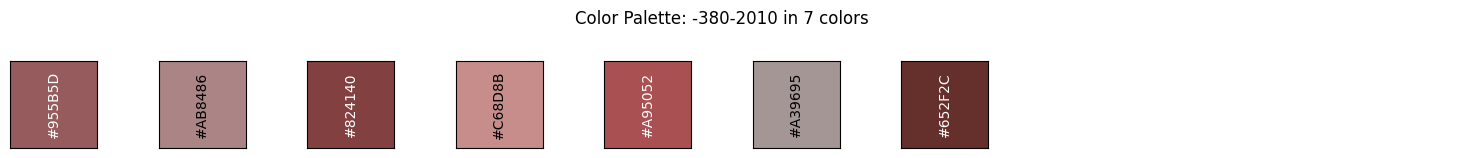

Plot saved to images/color_palettes/870-2010.png


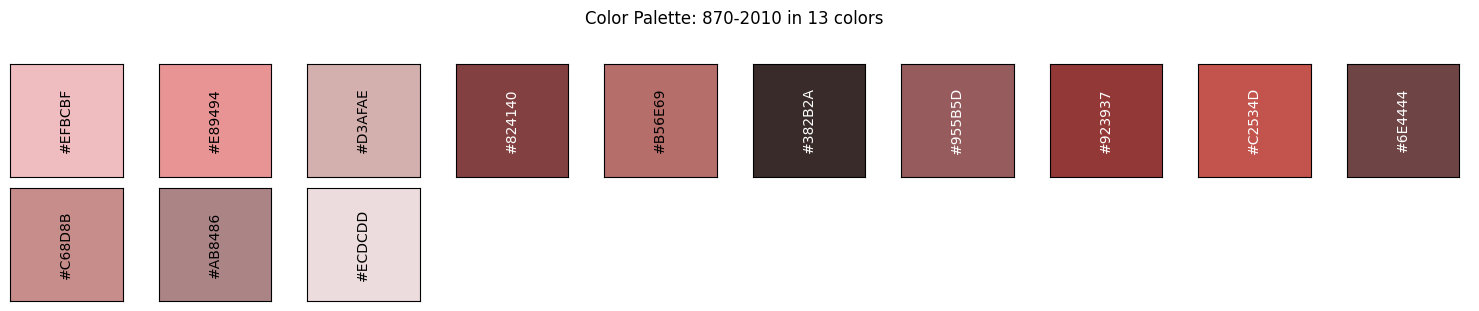

Plot saved to images/color_palettes/-1000-2010.png


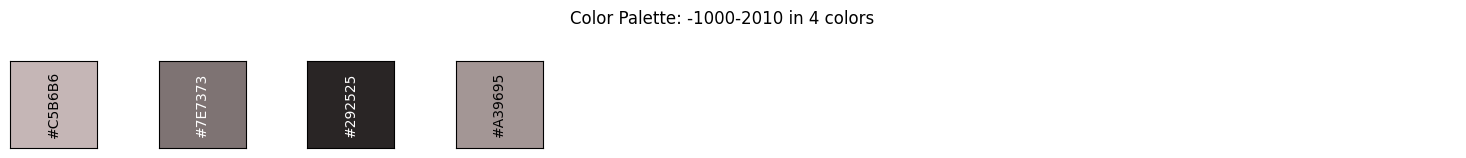

Plot saved to images/color_palettes/-320-2010.png


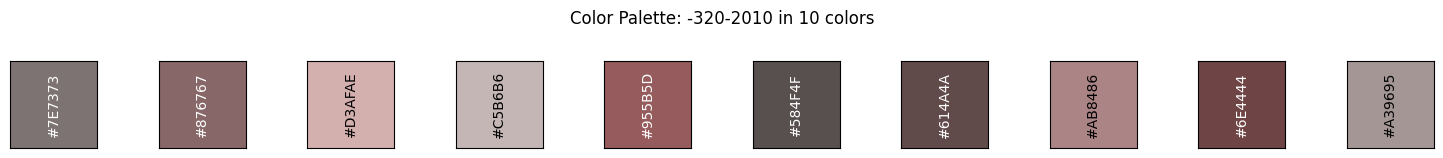

Plot saved to images/color_palettes/-250-2010.png


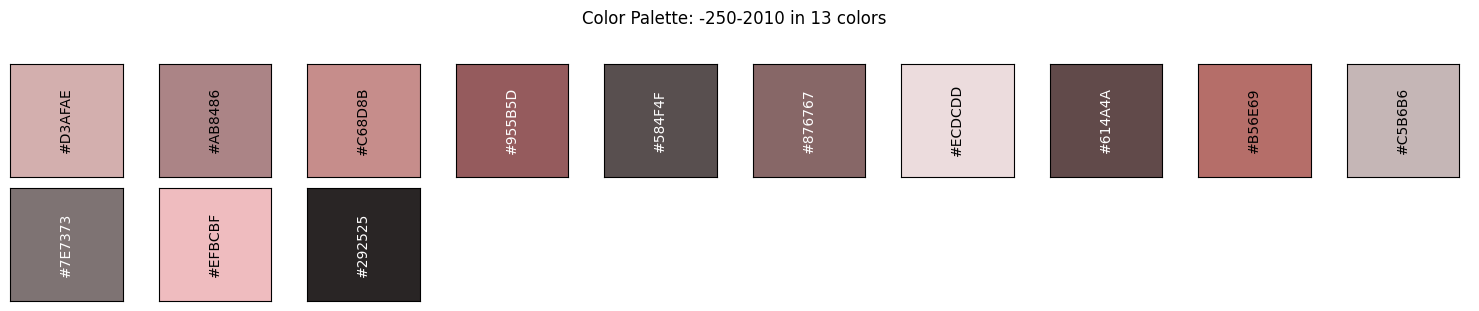

Plot saved to images/color_palettes/320-2010.png


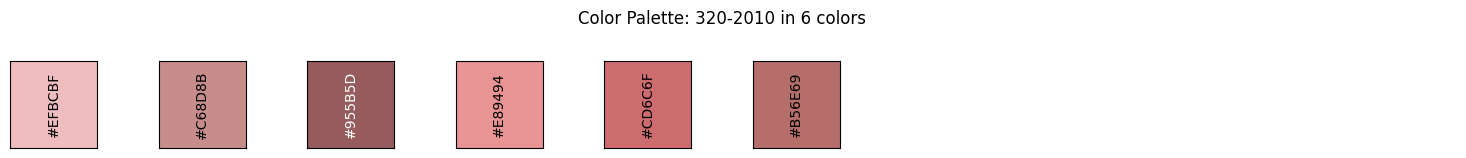

In [17]:
for decade_range in unique_decade_ranges:
    plotter.plot_color_grid(patterns_df, "decades", decade_range, save_path=f"images/color_palettes/{decade_range}.png")